# 3. Model Training 

In [ ]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

import sys  
sys.path.insert(1, '../src/user_identification')

from train_model import ClassifierEvaluator
from visualize import VisualizationUtils
import seaborn as sns
# import shap for ai explainability
import shap

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import tree

# import warnings to hide the unnessairy warniings
import warnings
warnings.filterwarnings('ignore')

c:\Users\Benhamadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mov_slow = pd.read_csv('../data/processed/movement_slow_stat_cleaned.csv').drop(columns=['Unnamed: 0']).fillna(0)
mov_fast = pd.read_csv('../data/processed/movement_fast_stat_cleaned.csv').drop(columns=['Unnamed: 0']).fillna(0)
traffic_slow = pd.read_csv('../data/processed/traffic_slow_stat_cleaned.csv', index_col=0).fillna(0)
traffic_fast = pd.read_csv('../data/processed/traffic_fast_stat_cleaned.csv', index_col=0).fillna(0)

In [3]:
for col in mov_fast.columns.values:
    if "PosY" in col and "Accel" not in col and "Velocity" not in col:
        print(col)
        for id in range(60):
            #print(id, col, mov_fast.loc[mov_fast['ID'] == id][col])
            print(id, col, np.mean(mov_fast.loc[mov_fast['ID'] == id,col]), np.max(mov_fast.loc[mov_fast['ID'] == id,col]), np.min(mov_fast.loc[mov_fast['ID'] == id,col]))
            mov_fast.loc[mov_fast['ID'] == id,col] = mov_fast.loc[mov_fast['ID'] == id,col] / np.mean(mov_fast.loc[mov_fast['ID'] == id,col])
            print(id, col, np.mean(mov_fast.loc[mov_fast['ID'] == id,col]), np.max(mov_fast.loc[mov_fast['ID'] == id,col]), np.min(mov_fast.loc[mov_fast['ID'] == id,col]))
            mov_slow.loc[mov_slow['ID'] == id,col] = mov_slow.loc[mov_slow['ID'] == id,col] / np.mean(mov_fast.loc[mov_fast['ID'] == id,col])

HeadPosY_25%
0 HeadPosY_25% 0.7134620286105323 0.7278551096508605 0.6570334403533158
0 HeadPosY_25% 0.9999999999999999 1.0201735768171976 0.9209087716032888
1 HeadPosY_25% 0.7788999002622312 0.8124401626932196 0.2526097097609505
1 HeadPosY_25% 0.9999999999999998 1.0430610691048958 0.3243160124630966
2 HeadPosY_25% 0.9066900340050817 0.9214591842635648 0.7479711538667484
2 HeadPosY_25% 1.0000000000000002 1.0162890841462588 0.824946923220021
3 HeadPosY_25% 0.8121922818530807 0.8303501245472713 0.7458421772961998
3 HeadPosY_25% 1.0 1.0223565811937563 0.918307393409972
4 HeadPosY_25% 0.8161531278178419 0.8245928921311398 0.7965606533430714
4 HeadPosY_25% 1.0 1.0103409078831365 0.9759941194771192
5 HeadPosY_25% 0.8564253755159127 0.9103195392500604 0.7888929107650393
5 HeadPosY_25% 0.9999999999999999 1.0629291999920971 0.9211461188779096
6 HeadPosY_25% 0.8777812166008767 0.8872263547594619 0.8320635865758819
6 HeadPosY_25% 1.0 1.0107602418233106 0.9479168280656176
7 HeadPosY_25% 0.857940040

In [4]:
# Concatenate movement and traffic data for both slow and fast datasets
mov_combined = pd.concat([mov_slow, traffic_slow.drop(columns=['time_interval','ID'])], axis=1).dropna()
fast_combined = pd.concat([mov_fast, traffic_fast.drop(columns=['time_interval','ID'])], axis=1).dropna()

## 3.1. Movement Data
### 3.1.1. Training On Cooking Similator

In [5]:
evaluator = ClassifierEvaluator()
X, y, fX, fy, X_train, y_train, X_test, y_test, fX_train, fy_train, fX_test, fy_test = evaluator.split_data(mov_combined, fast_combined, id_range=range(0,30), train_minutes=8, test_minutes=2)

Size of the training set:  (1437, 490)
Size of the slow testing set:  (360, 490)
Size of the fast training set:  (1440, 490)
Size of the fast testing set:  (360, 490)


In [6]:
Accuracy_set, models, best_model_slow, best_model_fast, cm_slow, cm_fast, best_model_slow_name, best_model_fast_name = evaluator.evaluate_classifiers(X_train,y_train,X_test,y_test,fX_test,fy_test)
Accuracy_set.sort_values(by='Accuracy(Slow)').style.background_gradient(cmap= plt.cm.Blues)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [06:08<00:00, 24.59s/it]


,Model,Accuracy(Train),Accuracy(Slow),Accuracy(Fast),F1(Train),F1(Slow),F1(Fast),Precision(Train),Precision(Slow),Precision(Fast),Recall(Train),Recall(Slow),Recall(Fast),Log_loss(Train),Log_loss(Slow),Log_loss(Fast)
7,AdaBoostClassifier,0.041754,0.044444,0.033333,0.012068,0.016416,0.006274,0.014134,0.020282,0.009425,0.041667,0.044444,0.033333,3.327380,3.276759,4.419064
11,BernoulliNB,0.130828,0.072222,0.072222,0.129862,0.024559,0.037411,0.739308,0.021769,0.029147,0.130602,0.072222,0.072222,3.243269,3.372645,3.898921
9,QuadraticDiscriminantAnalysis,1.000000,0.088889,0.036111,1.000000,0.088754,0.035855,1.000000,0.097864,0.044390,1.000000,0.088889,0.036111,0.000000,32.839773,34.742077
0,SVC,0.617258,0.483333,0.108333,0.595067,0.446300,0.066065,0.654711,0.556004,0.054628,0.615972,0.483333,0.108333,3.409392,3.407590,3.401520
4,KNeighborsClassifier,0.895616,0.636111,0.088889,0.894285,0.616265,0.052263,0.904976,0.672777,0.064819,0.895741,0.636111,0.088889,0.263105,7.296952,29.532607
3,DecisionTreeClassifier,1.000000,0.730556,0.119444,1.000000,0.710146,0.094463,1.000000,0.744920,0.093528,1.000000,0.730556,0.119444,0.000000,9.711762,31.738439
8,GaussianNB,0.891441,0.747222,0.033333,0.889427,0.755140,0.002210,0.899744,0.793246,0.001143,0.891435,0.747222,0.033333,3.097500,7.855881,34.842198
6,MLPClassifier,0.986778,0.786111,0.072222,0.986725,0.772847,0.043262,0.986993,0.788283,0.070994,0.986806,0.786111,0.072222,0.115151,0.701266,14.460872
10,LogisticRegression,0.983994,0.802778,0.052778,0.983929,0.790509,0.036397,0.984351,0.798653,0.099660,0.984028,0.802778,0.052778,0.252338,0.714955,7.836561
12,BaggingClassifier,0.998608,0.813889,0.127778,0.998611,0.809094,0.095805,0.998639,0.842788,0.121901,0.998611,0.813889,0.127778,0.088786,2.485373,23.024411


In [7]:
explainer = shap.TreeExplainer(best_model_slow)
shap_values_slow = explainer.shap_values(X_test)

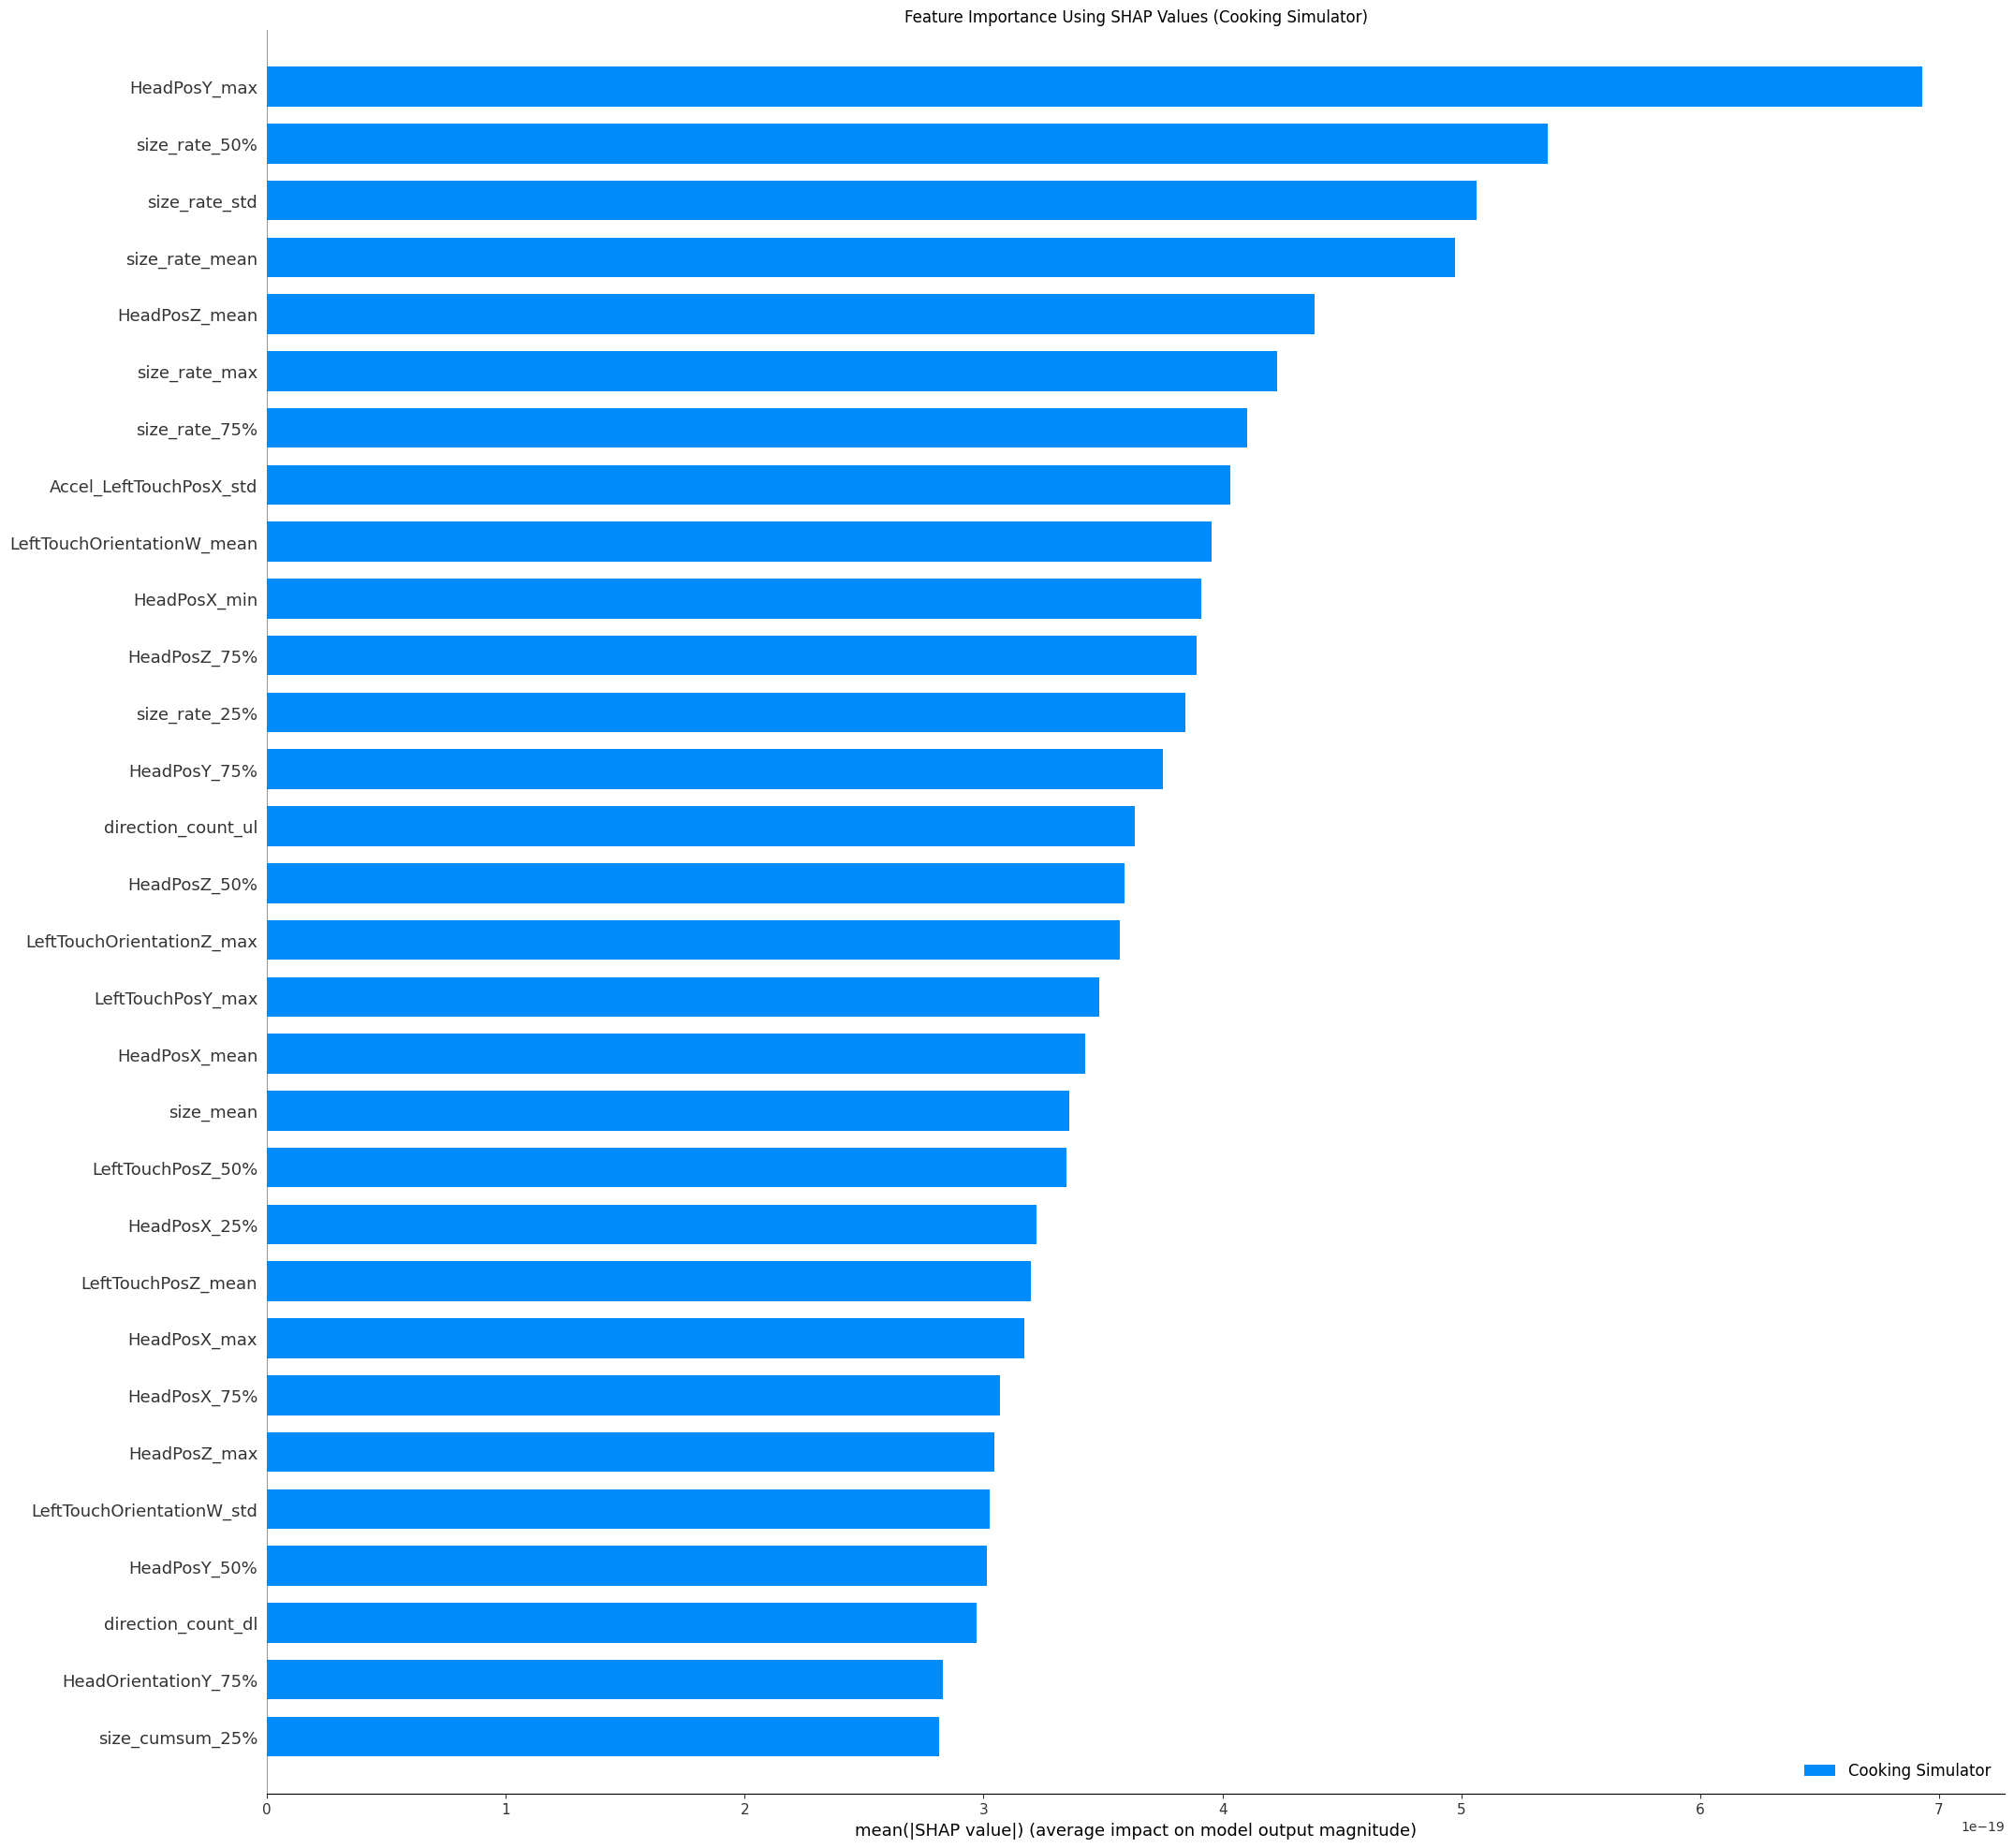

In [8]:
VisualizationUtils.shap_plotter([np.mean(shap_values_slow, axis=2)], 
                          X_test, title="Feature Importance Using SHAP Values (Cooking Simulator)",
                          class_names=['Cooking Simulator'])

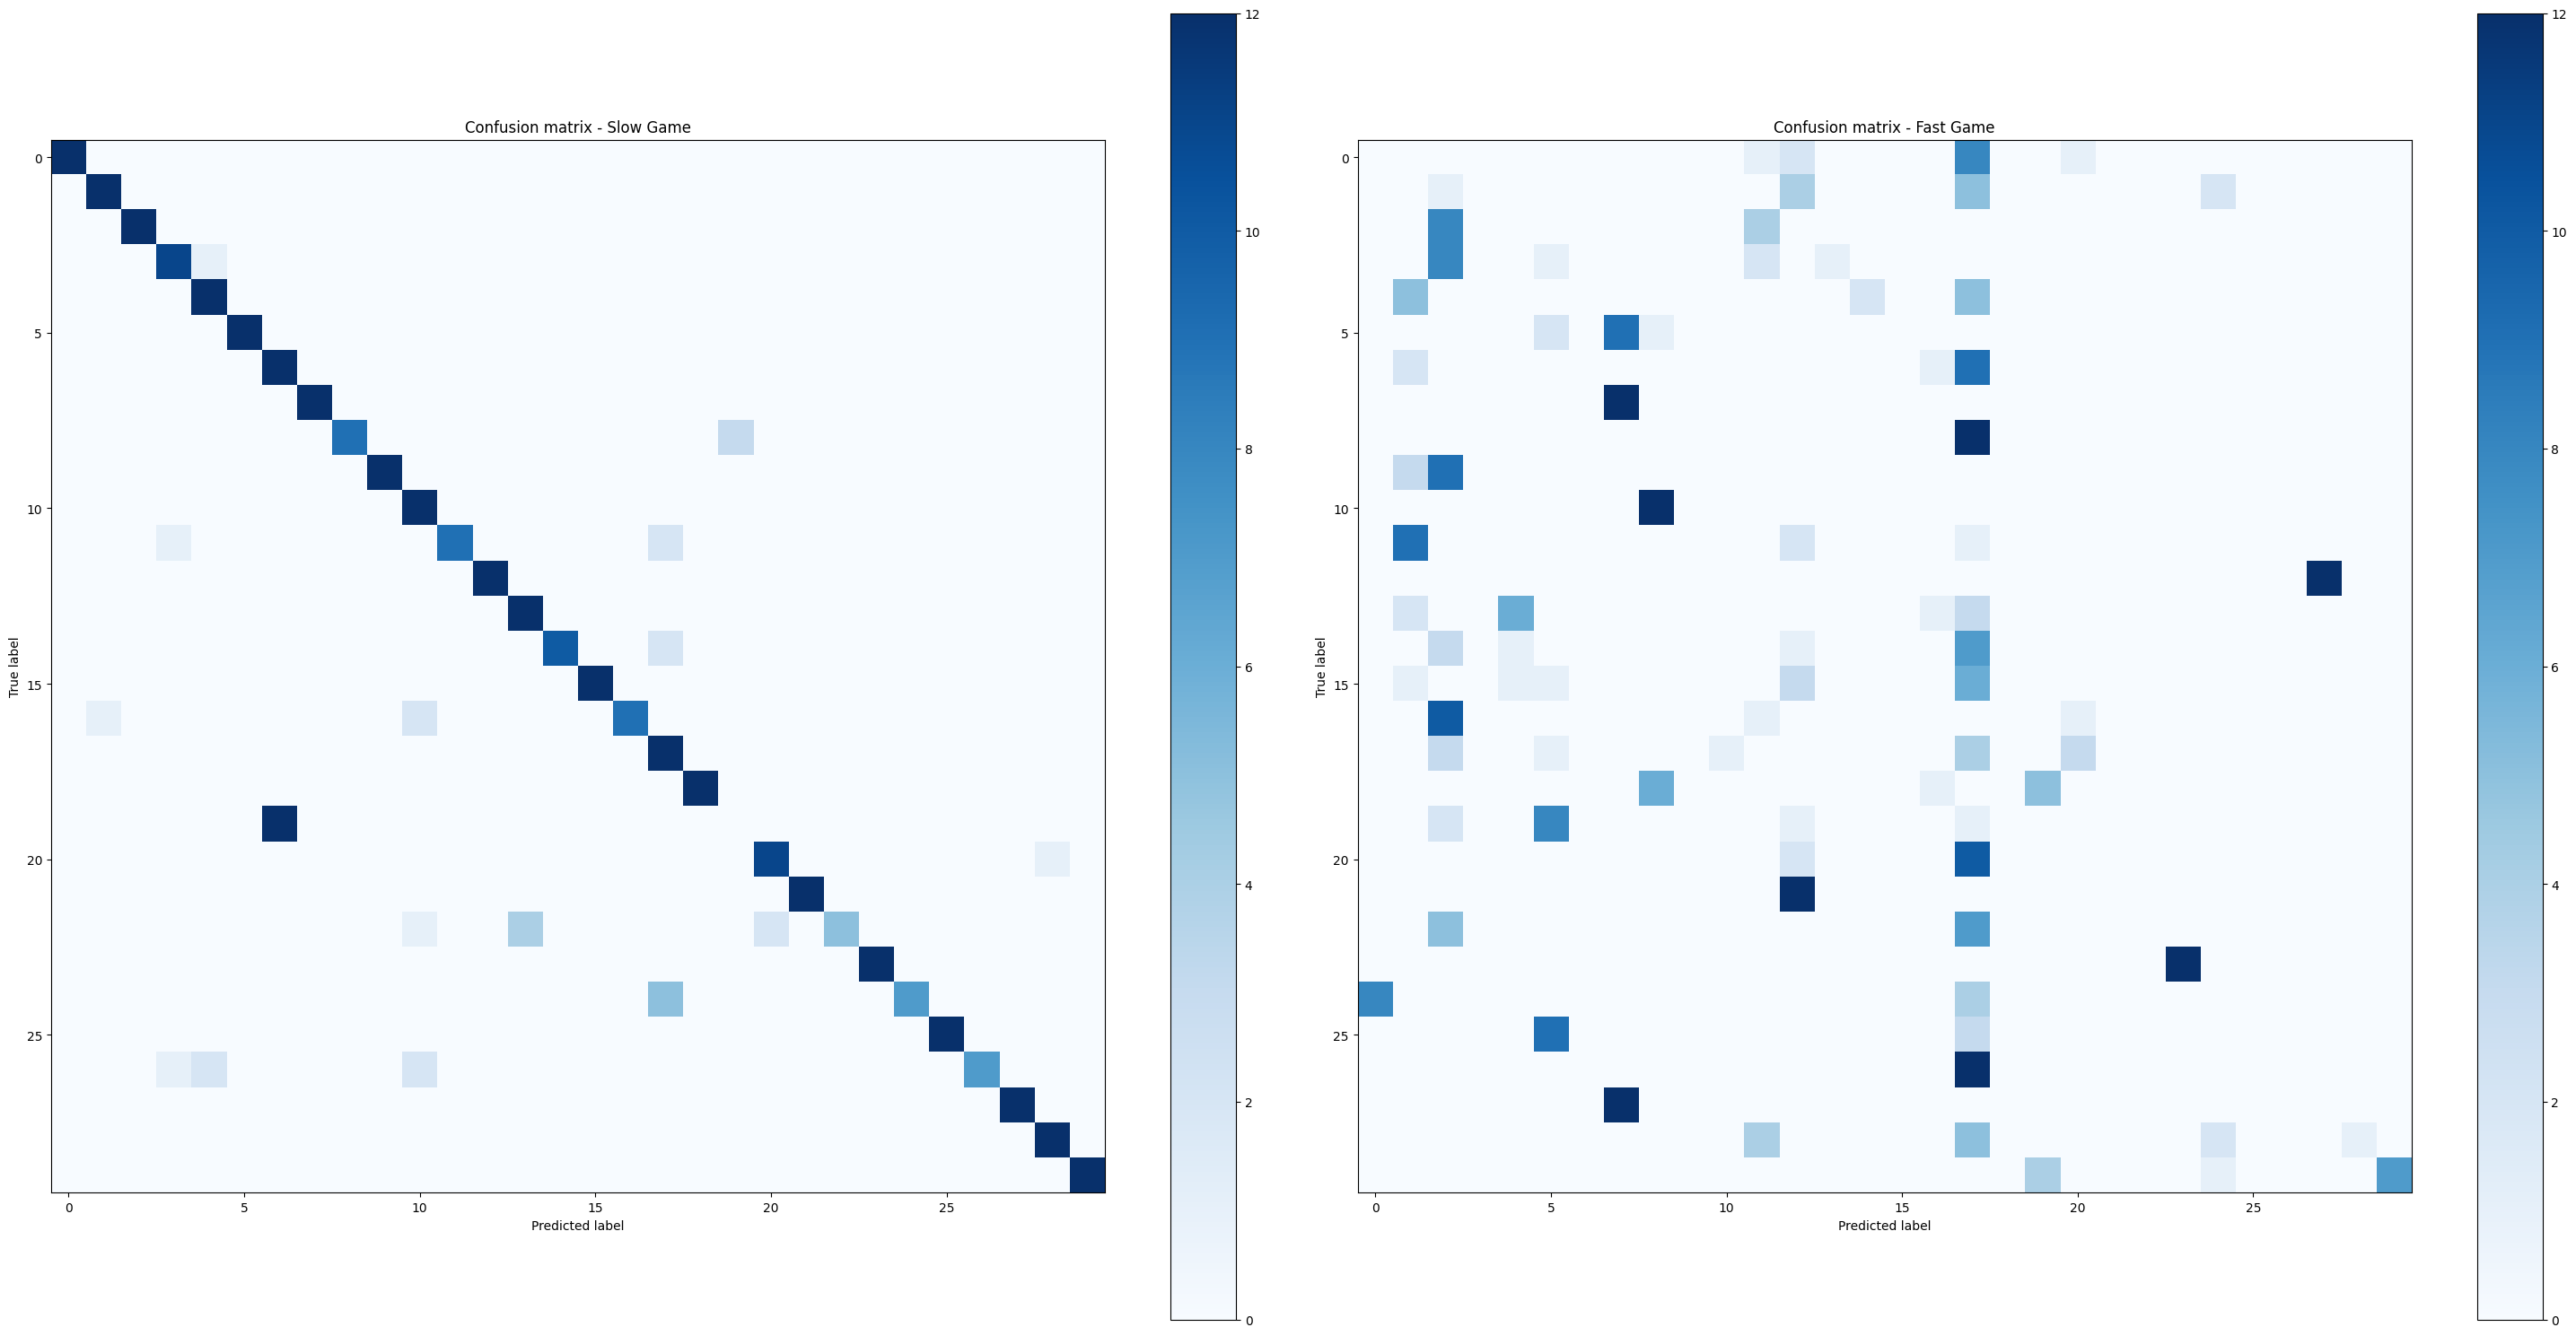

In [9]:
VisualizationUtils.confusion_matrices(cm_slow, cm_fast)

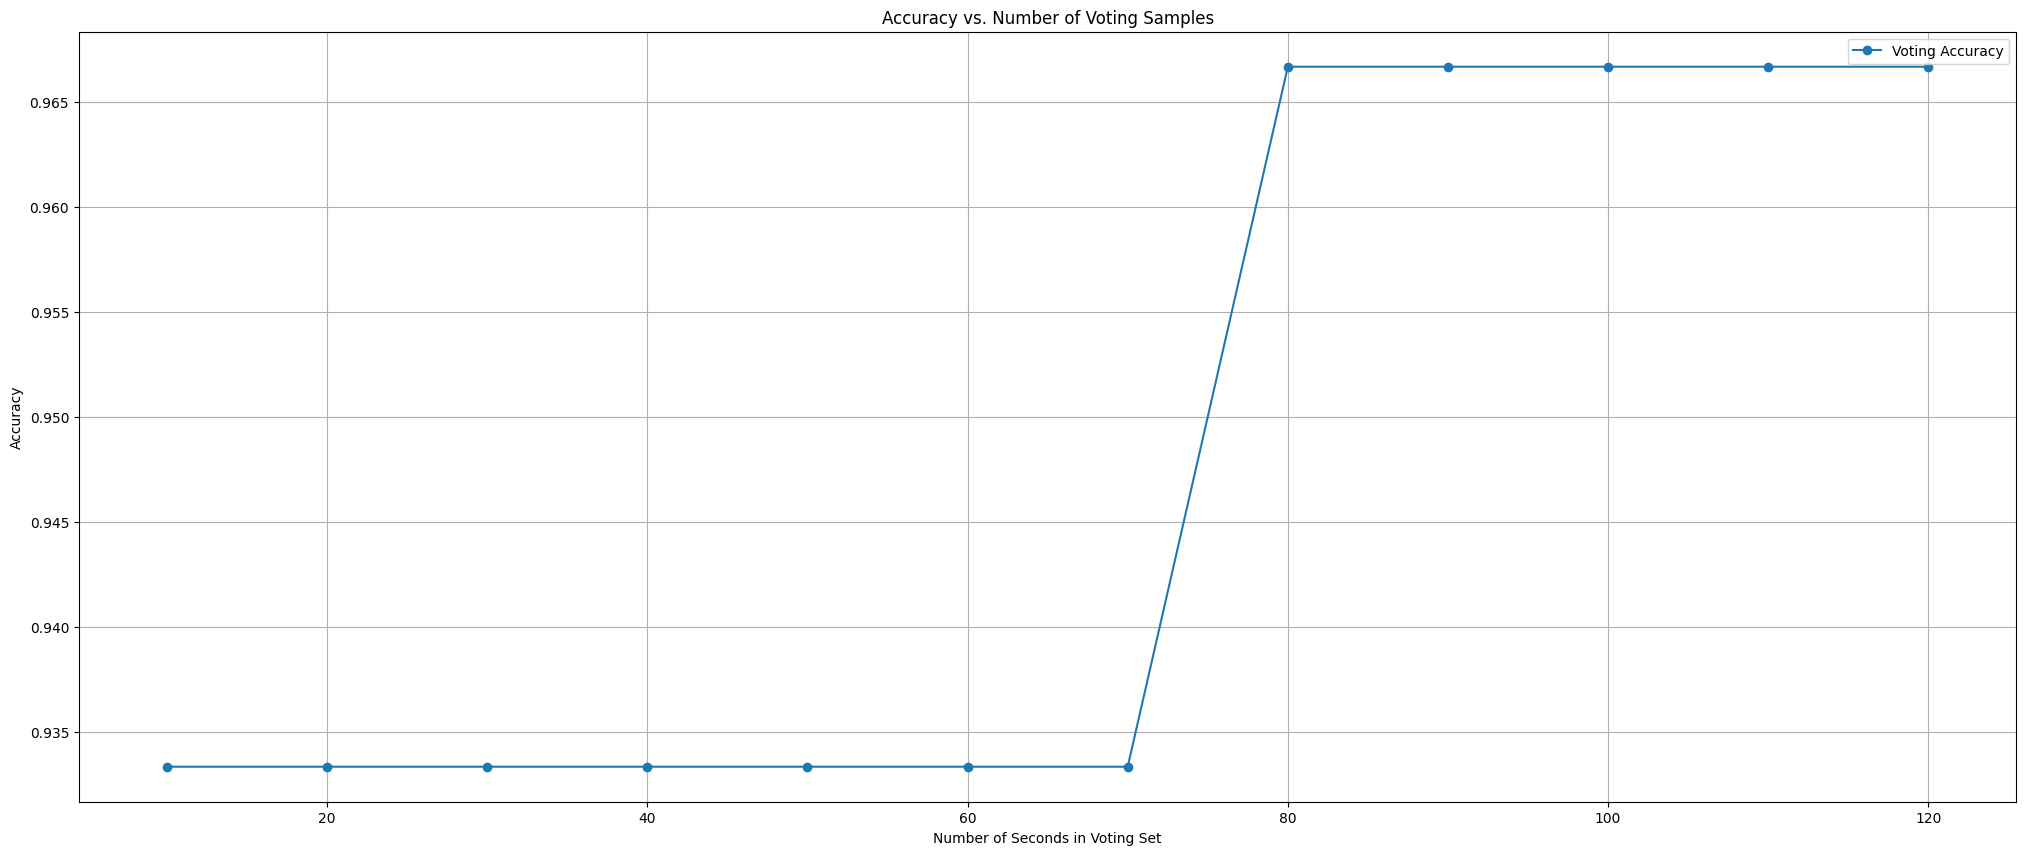


Vote Over Time Data Table:


,Seconds in Voting Set,Voting Accuracy
0,10,0.933333
1,20,0.933333
2,30,0.933333
3,40,0.933333
4,50,0.933333
5,60,0.933333
6,70,0.933333
7,80,0.966667
8,90,0.966667
9,100,0.966667


In [10]:
evaluator.plot_accuracy_by_vote(best_model_slow, X_test, y_test, increment=1)

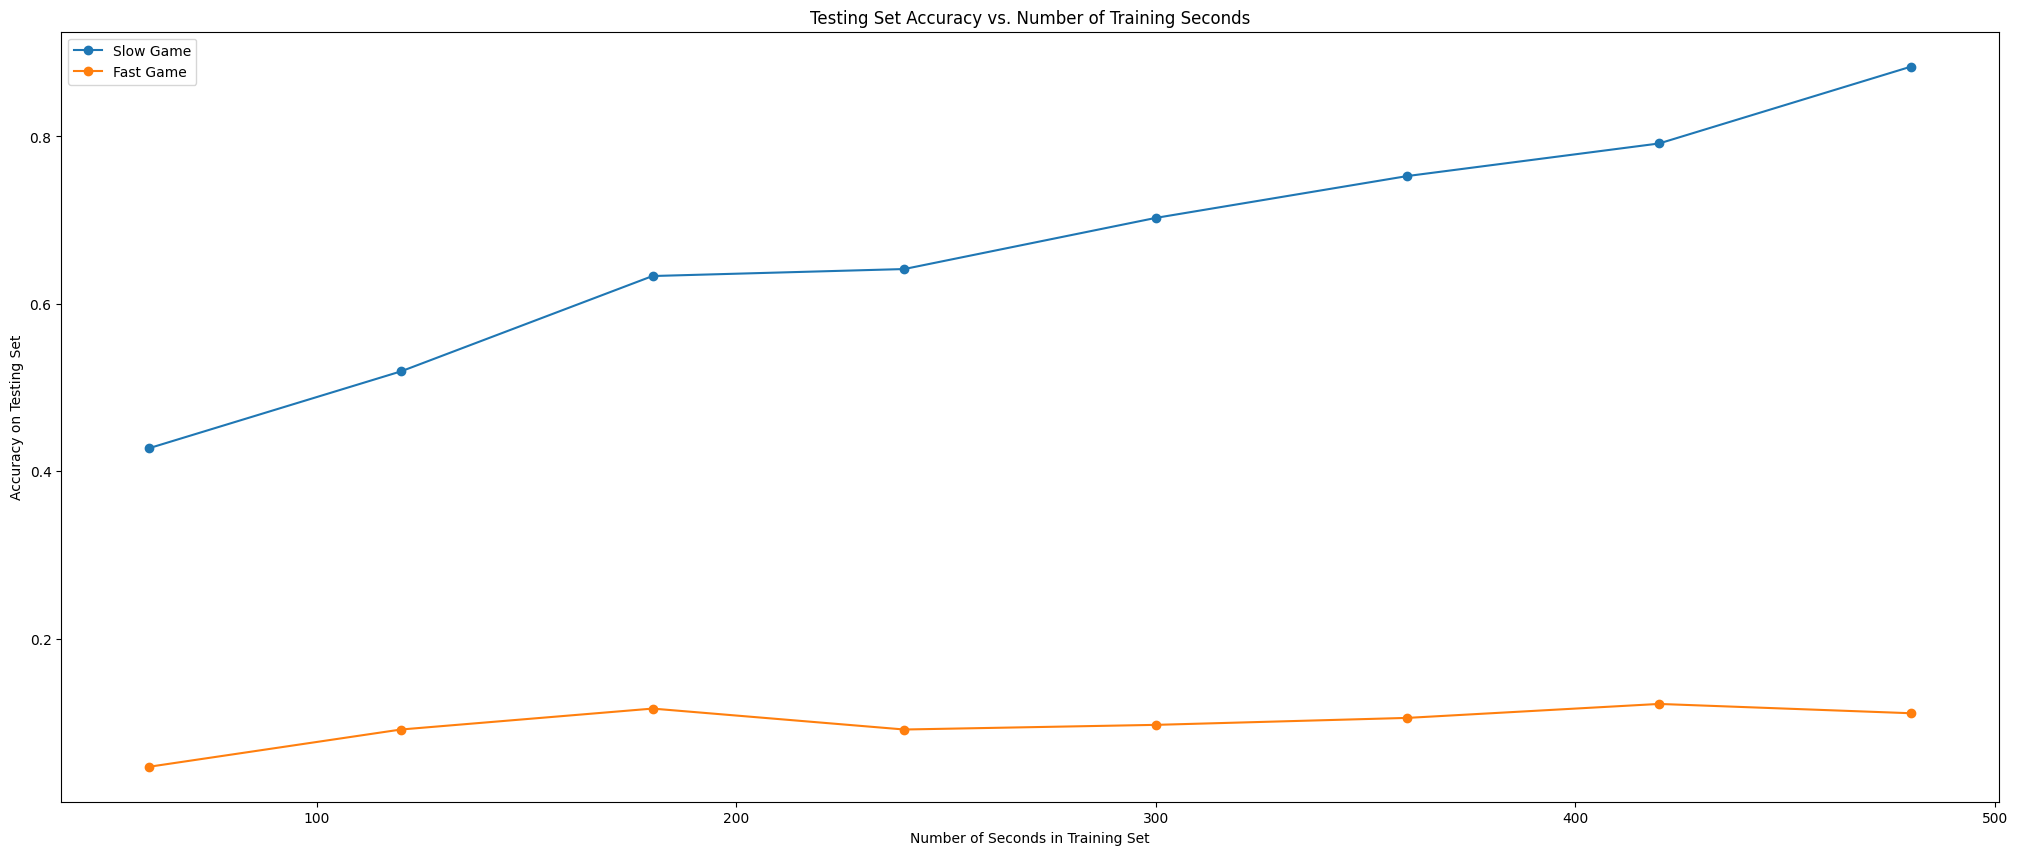


Accuracy Over Time Data Table:


,Seconds in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,60,0.427778,0.047222
1,120,0.519444,0.091667
2,180,0.633333,0.116667
3,240,0.641667,0.091667
4,300,0.702778,0.097222
5,360,0.752778,0.105556
6,420,0.791667,0.122222
7,480,0.883333,0.111111


In [11]:
evaluator.accuracy_over_time(X, y,best_model_slow_name, range(1,9), X_test, y_test, fX_test, fy_test)

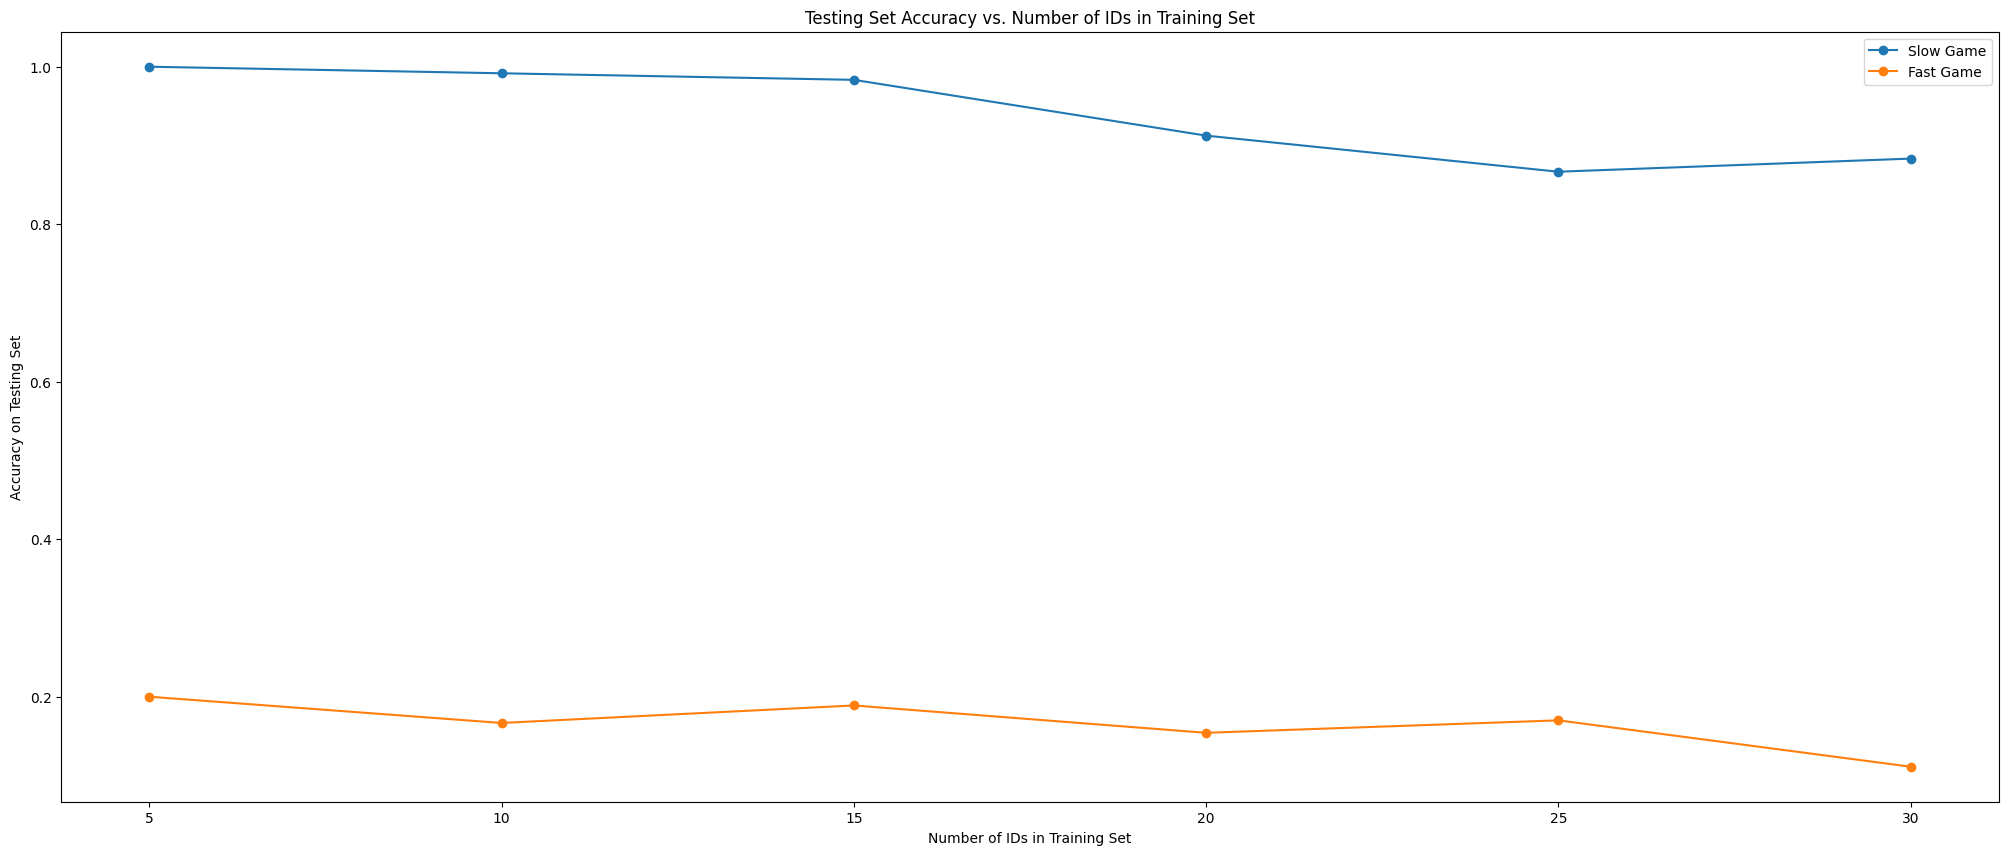


ID Over Time Data Table:


,Number of IDs in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,5,1.000000,0.200000
1,10,0.991667,0.166667
2,15,0.983333,0.188889
3,20,0.912500,0.154167
4,25,0.866667,0.170000
5,30,0.883333,0.111111


In [12]:
evaluator.accuracy_over_ids(X_train, y_train, best_model_slow_name,  X_test, y_test,fX_test, fy_test)

### 3.1.2. Training On Beat Saber

In [13]:
Accuracy_set, models, best_model_slow, best_model_fast, cm_slow, cm_fast,  best_model_slow_name, best_model_fast_name = evaluator.evaluate_classifiers(fX_train,fy_train,X_test,y_test,fX_test,fy_test)
Accuracy_set.sort_values(by='Accuracy(Fast)').style.background_gradient(cmap= plt.cm.Blues)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [06:12<00:00, 24.80s/it]


,Model,Accuracy(Train),Accuracy(Slow),Accuracy(Fast),F1(Train),F1(Slow),F1(Fast),Precision(Train),Precision(Slow),Precision(Fast),Recall(Train),Recall(Slow),Recall(Fast),Log_loss(Train),Log_loss(Slow),Log_loss(Fast)
9,QuadraticDiscriminantAnalysis,1.000000,0.025000,0.083333,1.000000,0.019516,0.081370,1.000000,0.016504,0.094913,1.000000,0.025000,0.083333,0.000000,35.142562,33.040016
7,AdaBoostClassifier,0.136111,0.088889,0.136111,0.066666,0.033641,0.064217,0.064513,0.023503,0.074462,0.136111,0.088889,0.136111,2.577401,4.899267,2.578081
11,BernoulliNB,0.243750,0.066667,0.241667,0.251351,0.024047,0.207399,0.436436,0.045810,0.205913,0.243750,0.066667,0.241667,2.676128,3.852145,2.913479
0,SVC,0.647222,0.050000,0.647222,0.645316,0.031360,0.628250,0.715290,0.039583,0.638513,0.647222,0.050000,0.647222,3.406214,3.401799,3.405057
4,KNeighborsClassifier,0.872917,0.036111,0.747222,0.873663,0.030253,0.741137,0.882132,0.030525,0.775692,0.872917,0.036111,0.747222,0.385220,31.888350,3.810904
3,DecisionTreeClassifier,1.000000,0.091667,0.758333,1.000000,0.067001,0.747801,1.000000,0.074551,0.791594,1.000000,0.091667,0.758333,0.000000,32.739652,8.710550
8,GaussianNB,0.929167,0.133333,0.780556,0.927635,0.093290,0.761951,0.934630,0.103950,0.782092,0.929167,0.133333,0.780556,2.053795,30.906042,7.349473
6,MLPClassifier,0.996528,0.075000,0.880556,0.996527,0.063473,0.879203,0.996584,0.074489,0.913824,0.996528,0.075000,0.880556,0.070061,7.733889,0.415854
12,BaggingClassifier,1.000000,0.144444,0.900000,1.000000,0.109727,0.899144,1.000000,0.107254,0.907524,1.000000,0.144444,0.900000,0.069206,24.748604,0.531021
10,LogisticRegression,0.995833,0.047222,0.922222,0.995840,0.041960,0.915611,0.995931,0.095181,0.947851,0.995833,0.047222,0.922222,0.182890,5.352013,0.414531


In [14]:
explainer = shap.TreeExplainer(best_model_fast)
shap_values_fast = explainer.shap_values(fX_test)

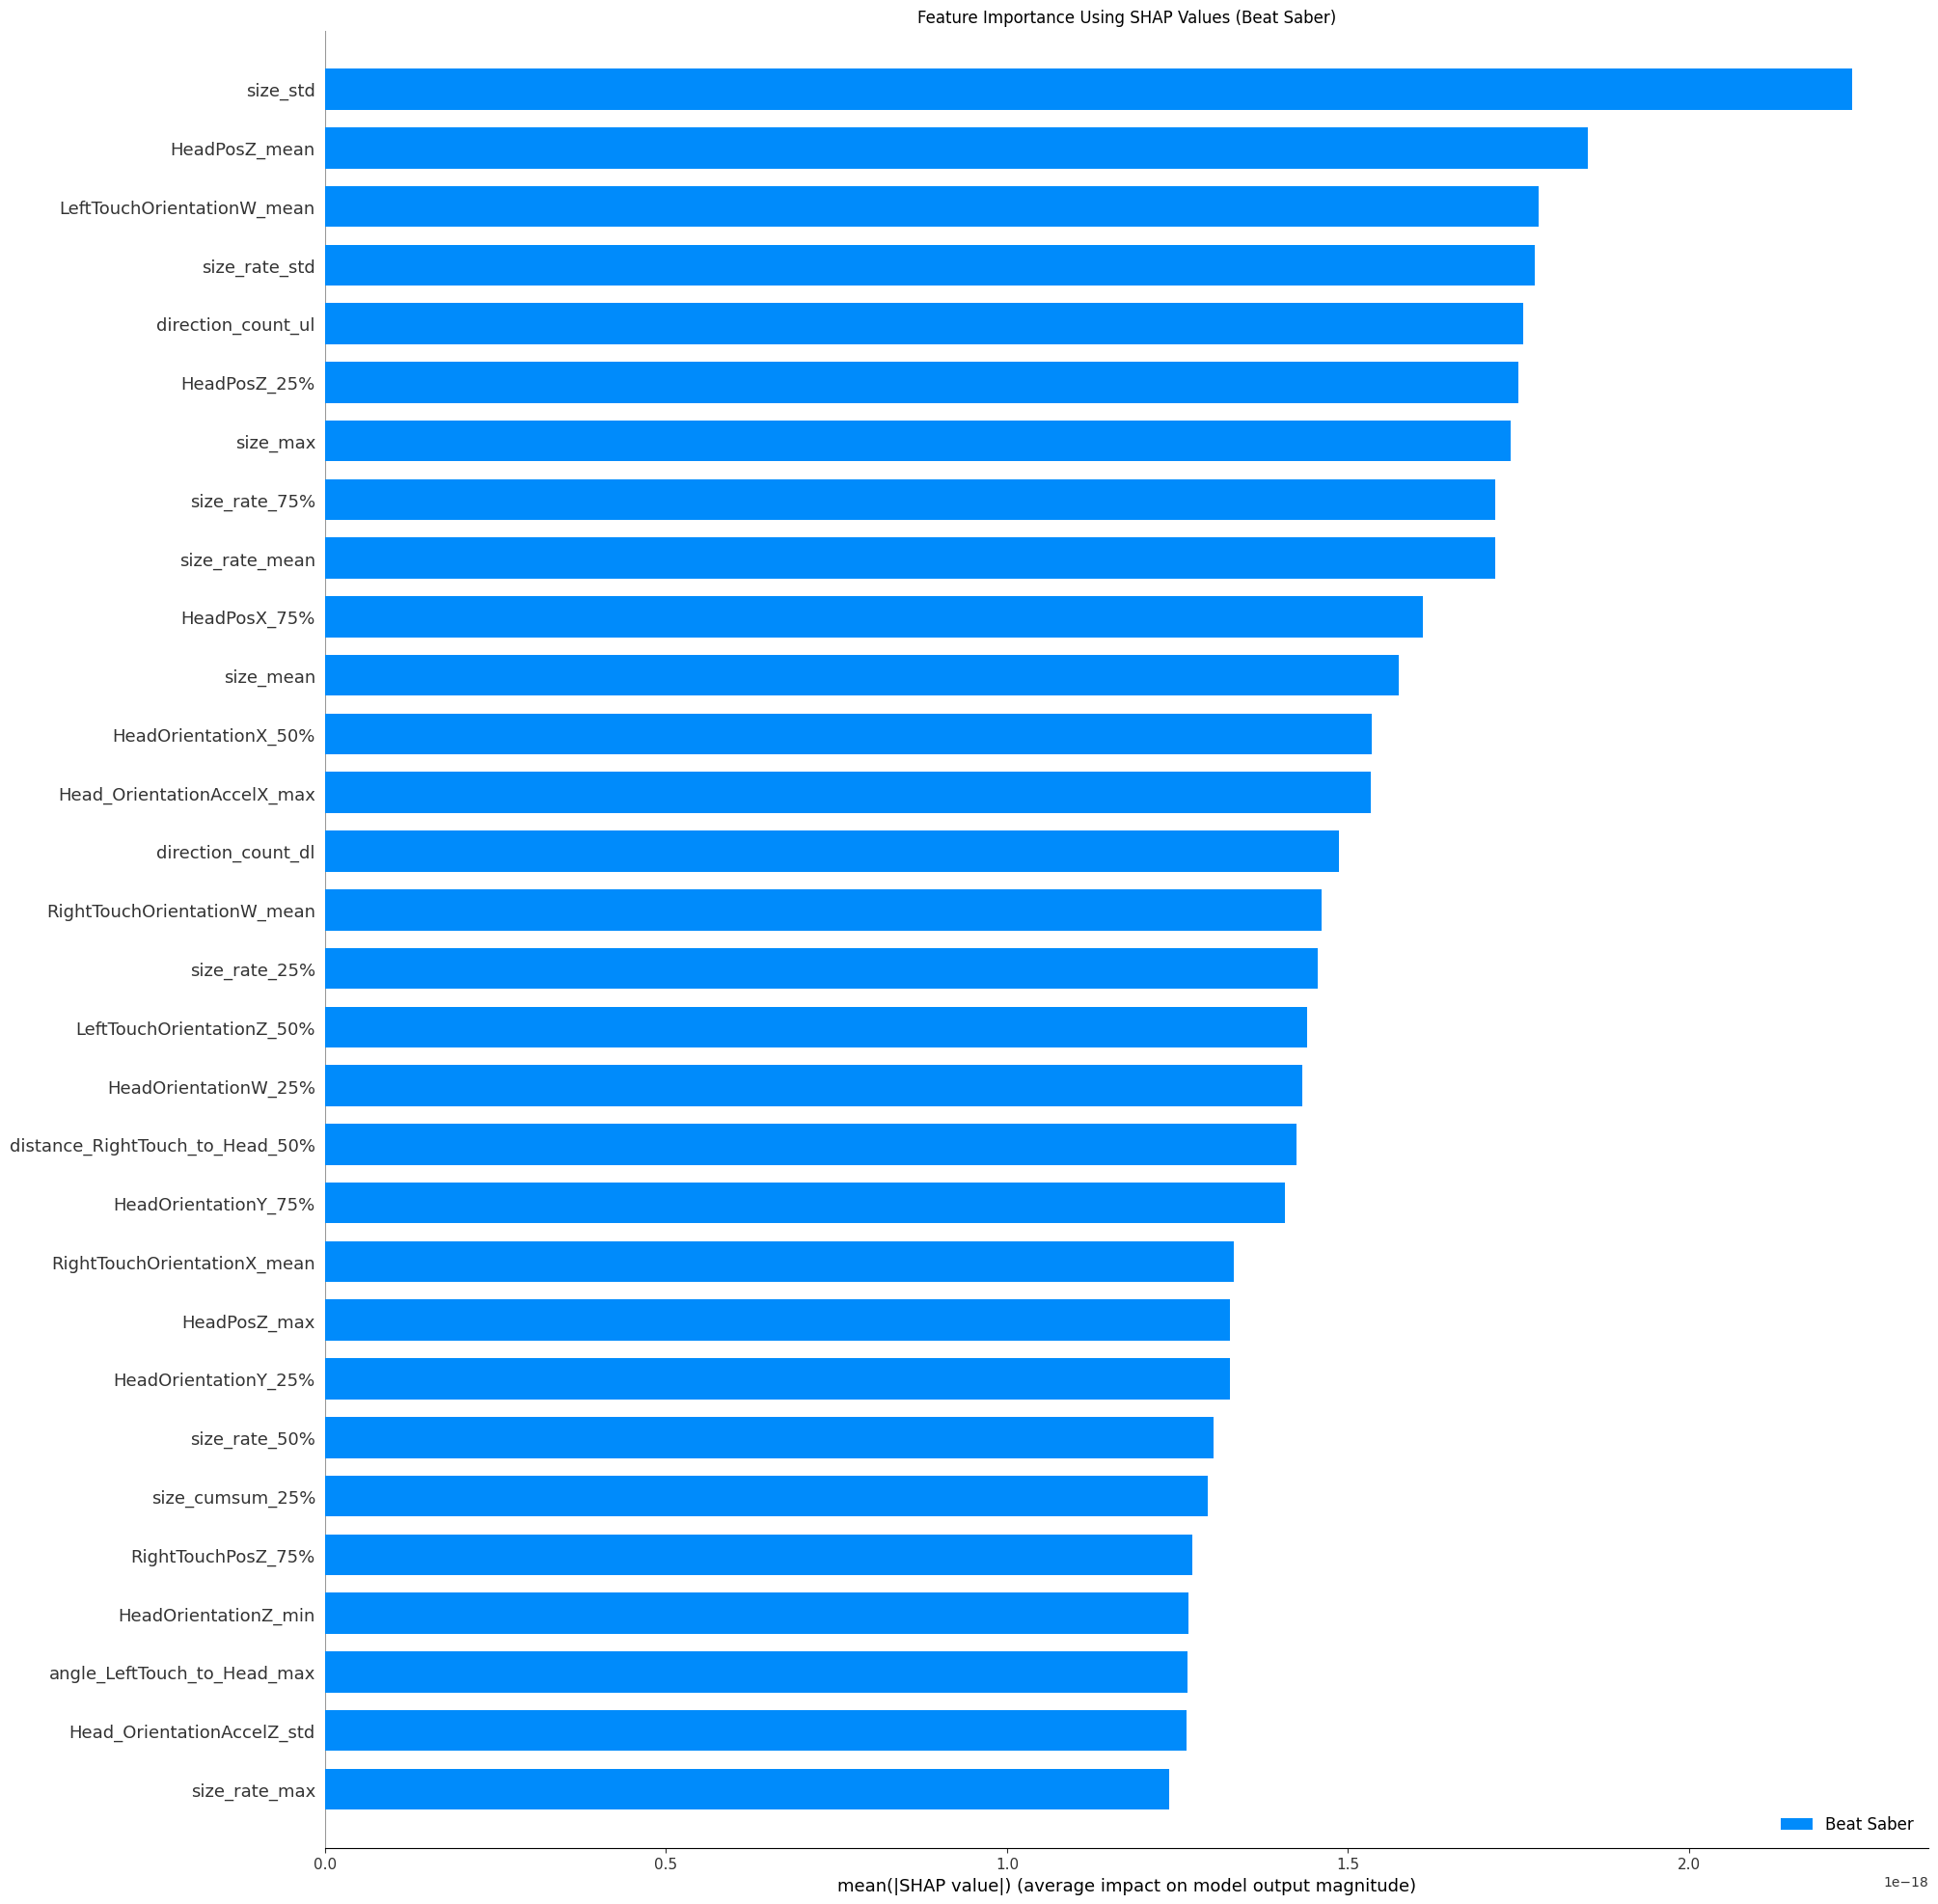

In [15]:
VisualizationUtils.shap_plotter([np.mean(shap_values_fast, axis=2)], 
                          fX_test, title="Feature Importance Using SHAP Values (Beat Saber)",
                          class_names=['Beat Saber'])

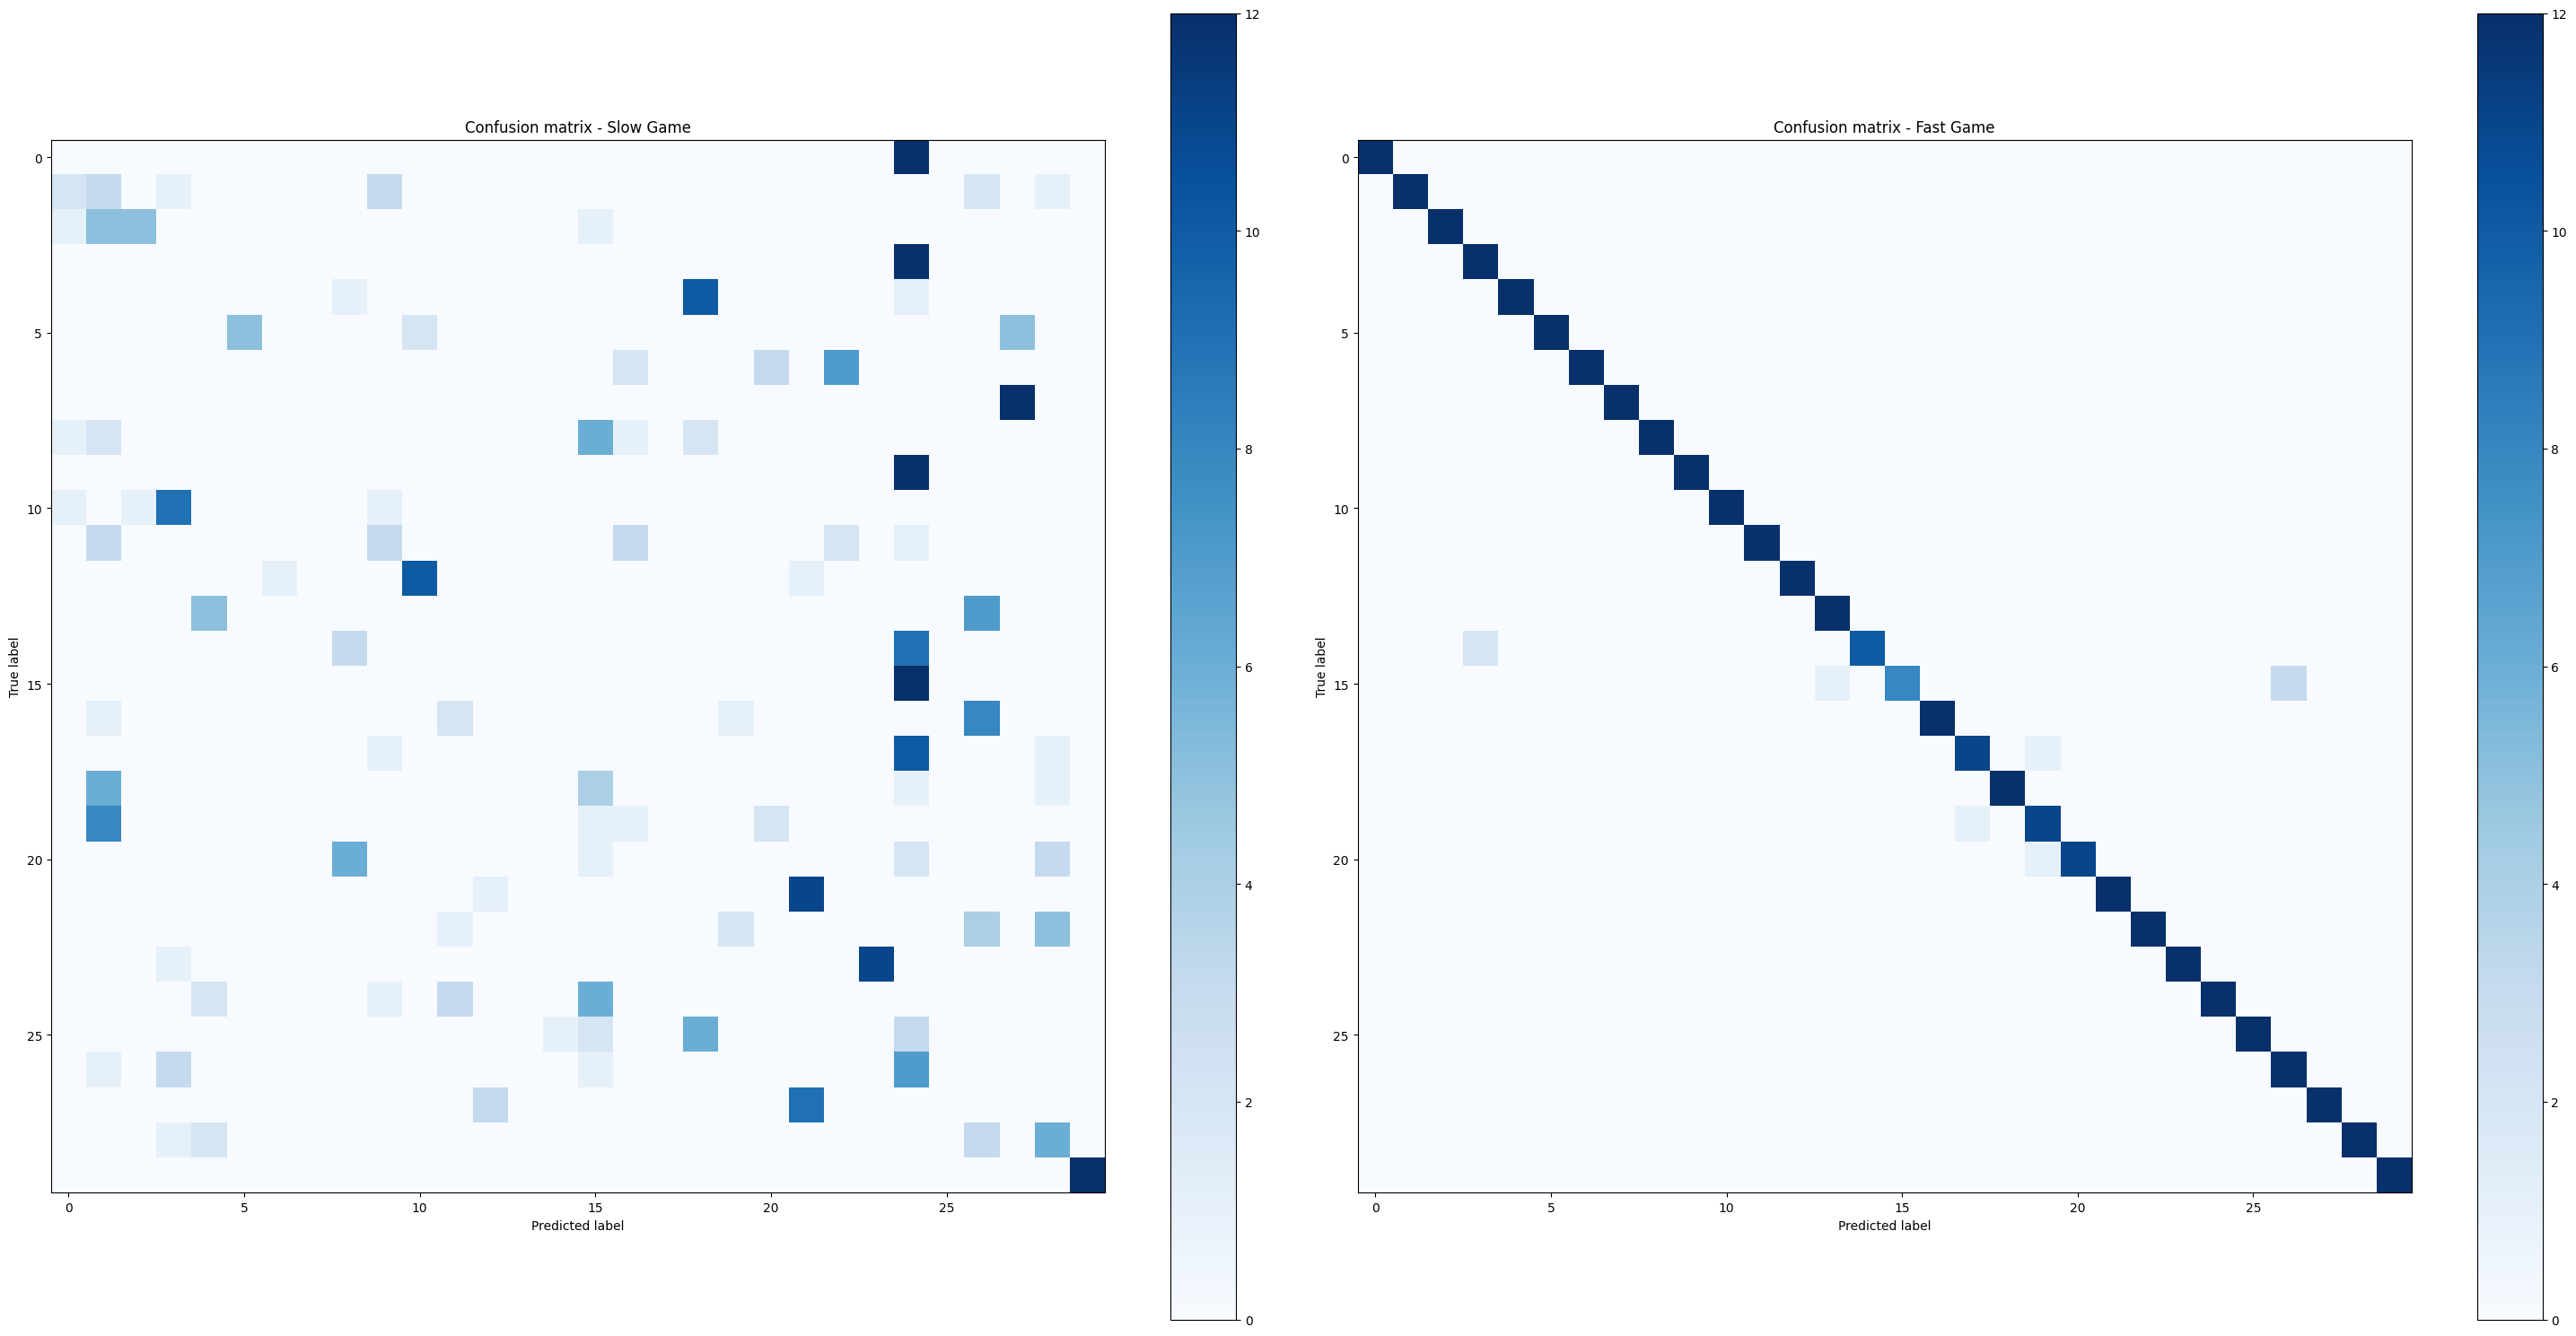

In [16]:
VisualizationUtils.confusion_matrices(cm_slow, cm_fast)

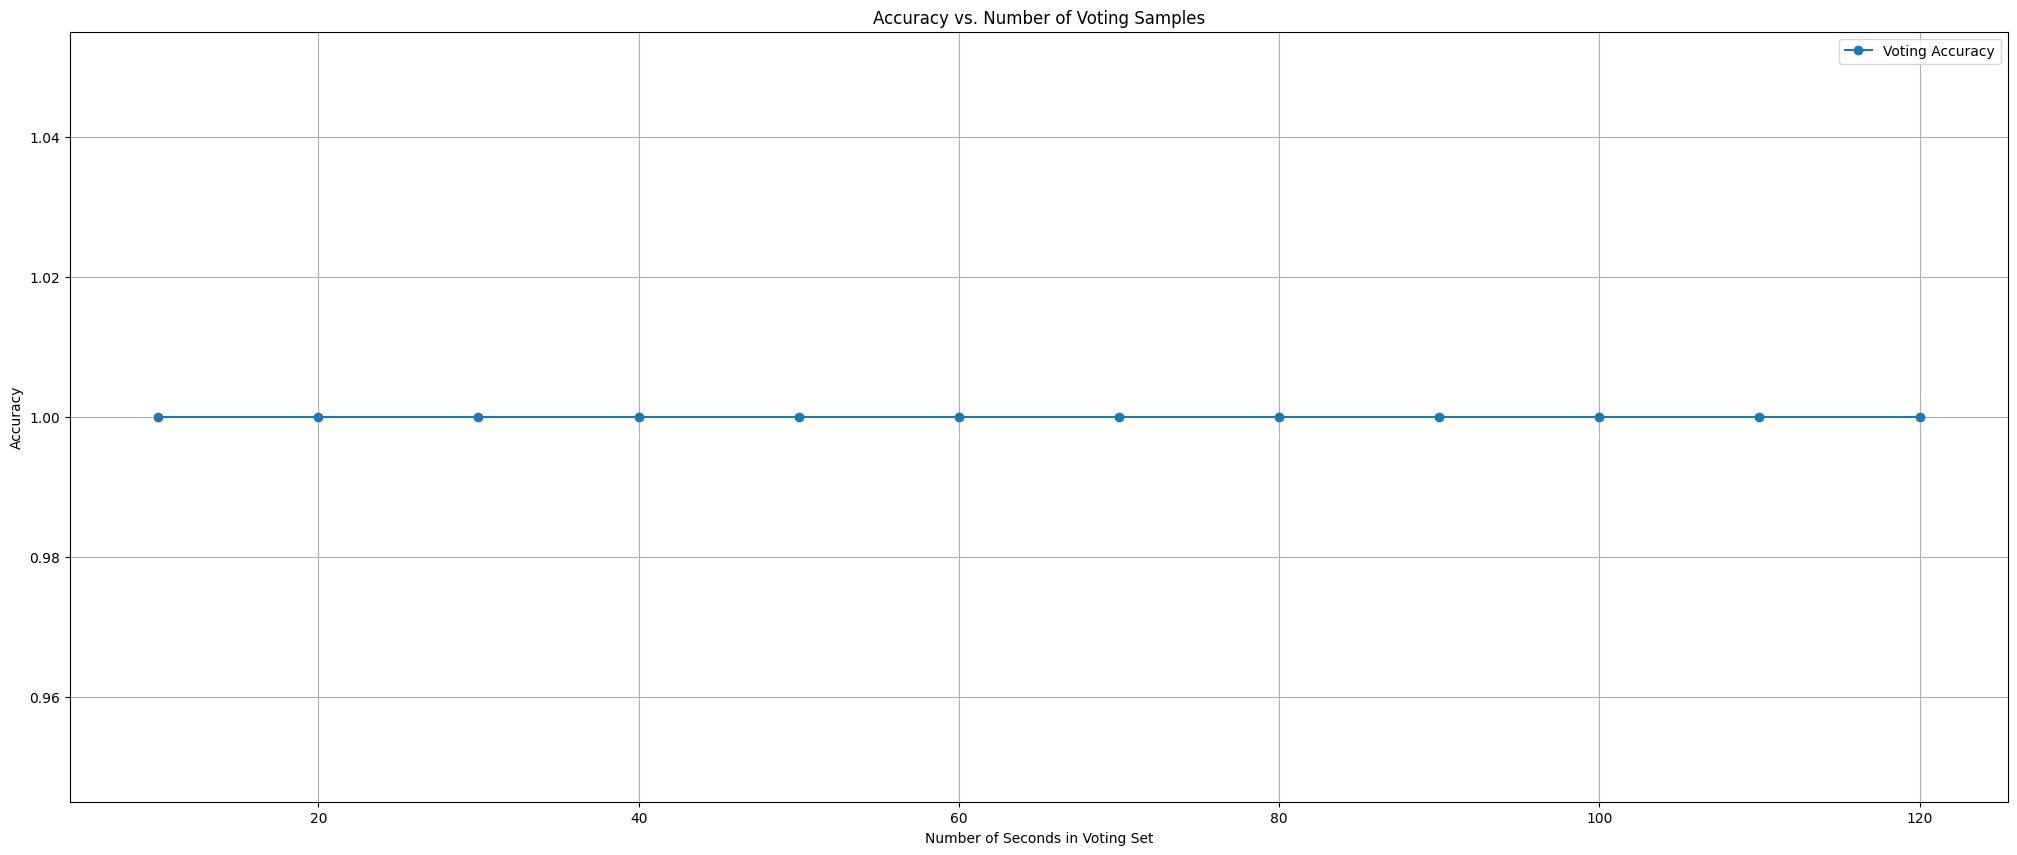


Vote Over Time Data Table:


,Seconds in Voting Set,Voting Accuracy
0,10,1.0
1,20,1.0
2,30,1.0
3,40,1.0
4,50,1.0
5,60,1.0
6,70,1.0
7,80,1.0
8,90,1.0
9,100,1.0


In [17]:
evaluator.plot_accuracy_by_vote(best_model_fast, fX_test, fy_test, increment=1)

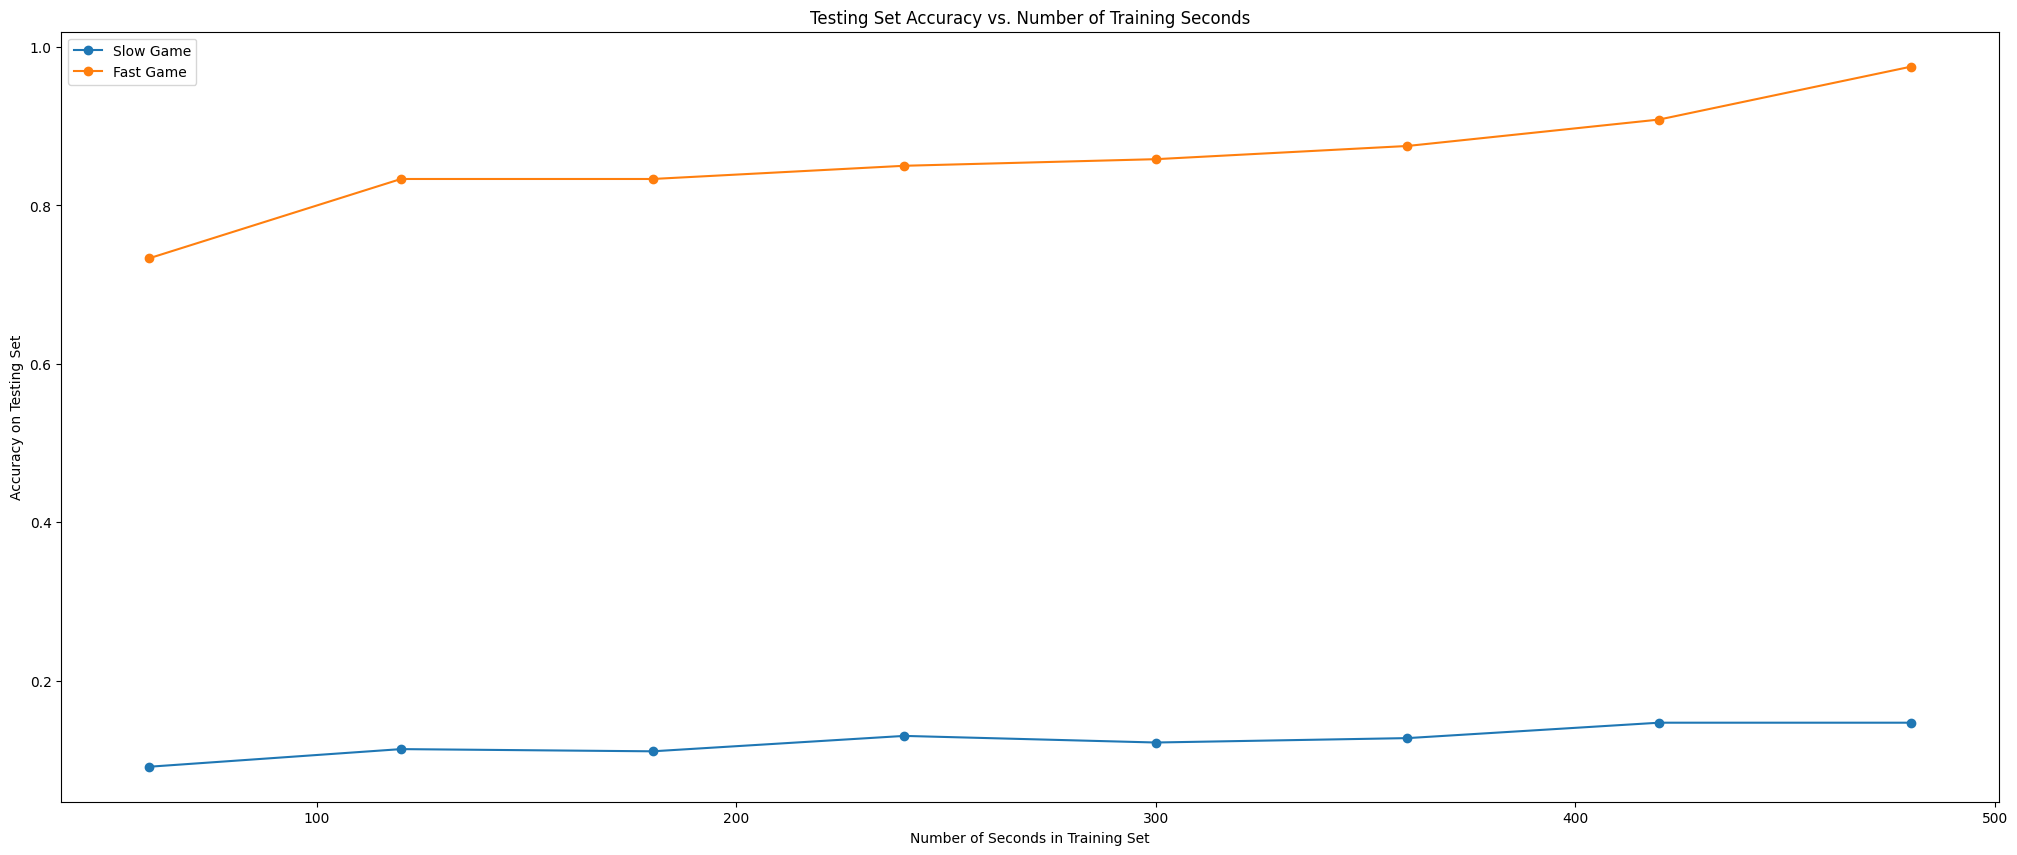


Accuracy Over Time Data Table:


,Seconds in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,60,0.091667,0.733333
1,120,0.113889,0.833333
2,180,0.111111,0.833333
3,240,0.130556,0.850000
4,300,0.122222,0.858333
5,360,0.127778,0.875000
6,420,0.147222,0.908333
7,480,0.147222,0.975000


In [18]:
evaluator.accuracy_over_time(fX, fy, best_model_fast_name, range(1,9), X_test, y_test, fX_test, fy_test)

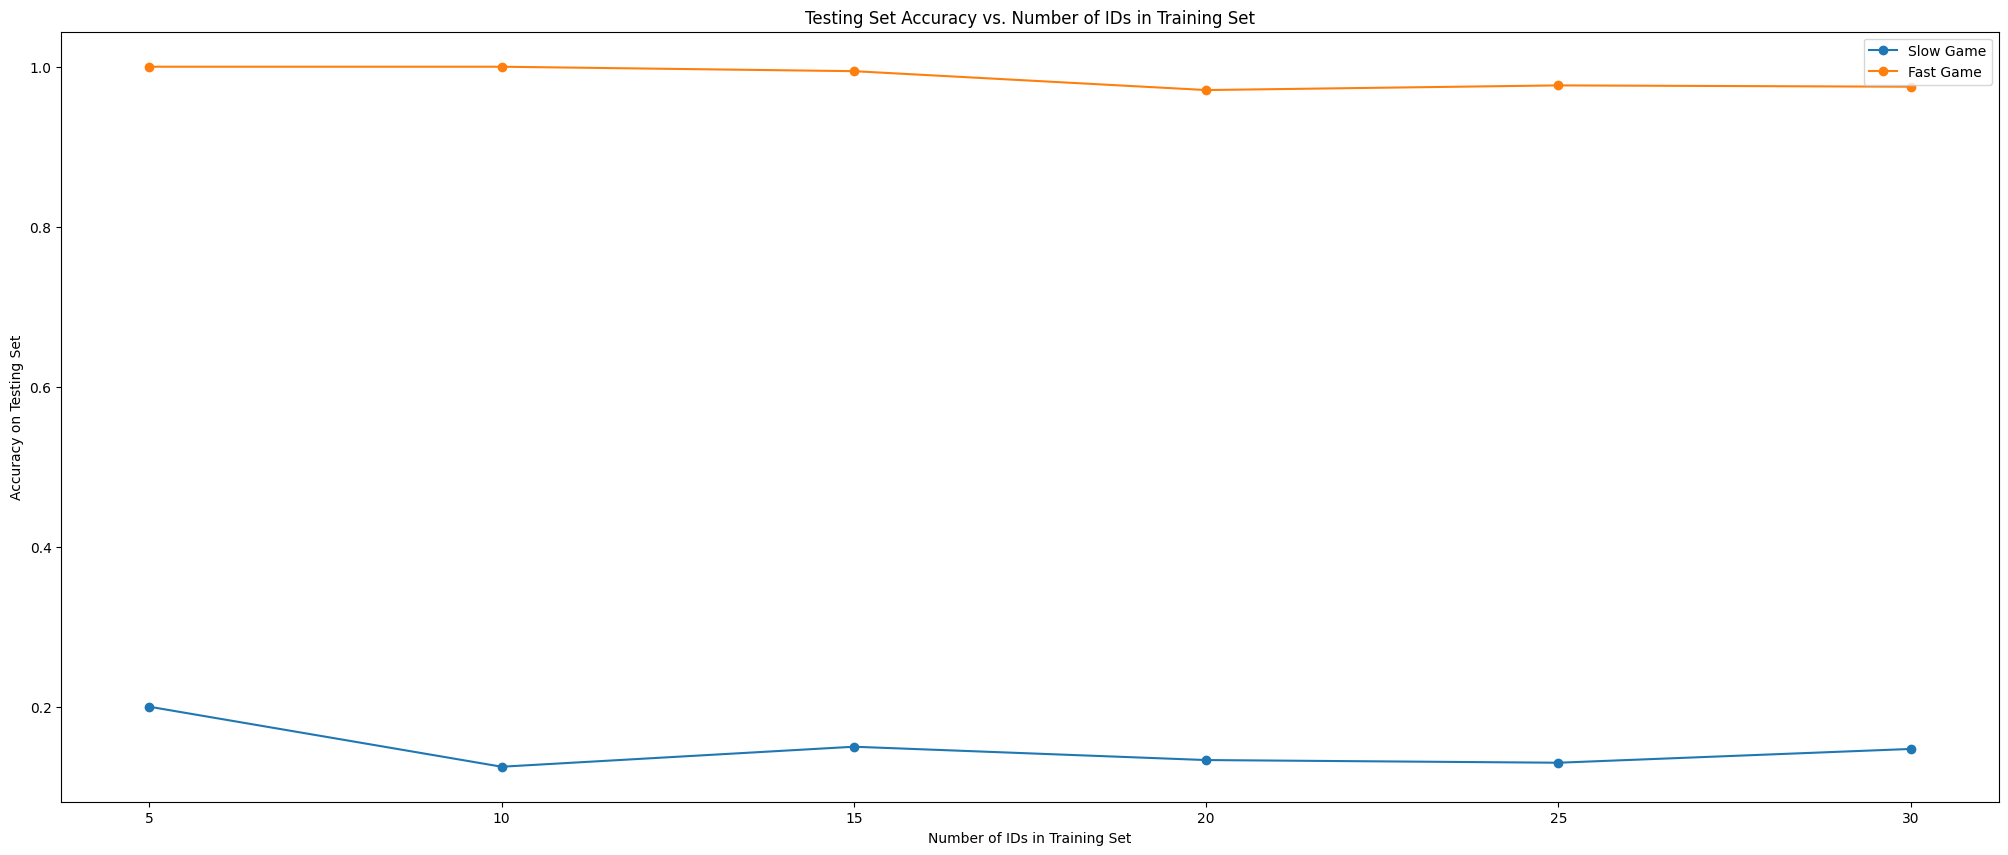


ID Over Time Data Table:


,Number of IDs in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,5,0.200000,1.000000
1,10,0.125000,1.000000
2,15,0.150000,0.994444
3,20,0.133333,0.970833
4,25,0.130000,0.976667
5,30,0.147222,0.975000


In [19]:
evaluator.accuracy_over_ids(fX_train, fy_train, best_model_fast_name, X_test, y_test,fX_test, fy_test)

### 3.1.3. Training On Forklift Simulator

In [20]:
X, y, fX, fy, X_train, y_train, X_test, y_test, fX_train, fy_train, fX_test, fy_test = evaluator.split_data(mov_combined, fast_combined

, id_range=range(30,60), train_minutes=8, test_minutes=2)

Size of the training set:  (1440, 490)
Size of the slow testing set:  (360, 490)
Size of the fast training set:  (1440, 490)
Size of the fast testing set:  (360, 490)


In [21]:
Accuracy_set, models, best_model_slow, best_model_fast, cm_slow, cm_fast, best_model_slow_name, best_model_fast_name = evaluator.evaluate_classifiers(X_train,y_train,X_test,y_test,fX_test,fy_test)
Accuracy_set.sort_values(by='Accuracy(Slow)').style.background_gradient(cmap= plt.cm.Blues)

100%|██████████| 15/15 [04:51<00:00, 19.41s/it]


,Model,Accuracy(Train),Accuracy(Slow),Accuracy(Fast),F1(Train),F1(Slow),F1(Fast),Precision(Train),Precision(Slow),Precision(Fast),Recall(Train),Recall(Slow),Recall(Fast),Log_loss(Train),Log_loss(Slow),Log_loss(Fast)
11,BernoulliNB,0.062500,0.052778,0.033333,0.048727,0.017421,0.002319,0.381201,0.013508,0.001201,0.062500,0.052778,0.033333,3.339850,3.365777,3.417712
9,QuadraticDiscriminantAnalysis,1.000000,0.077778,0.050000,1.000000,0.078368,0.040916,1.000000,0.089922,0.042834,1.000000,0.077778,0.050000,0.000000,33.240258,34.241471
7,AdaBoostClassifier,0.266667,0.266667,0.033333,0.213033,0.213033,0.013441,0.207407,0.207407,0.009475,0.266667,0.266667,0.033333,2.555659,2.556441,6.012260
0,SVC,0.755556,0.800000,0.072222,0.743497,0.788462,0.046328,0.825871,0.852469,0.037608,0.755556,0.800000,0.072222,3.411707,3.411956,3.403204
8,GaussianNB,0.945833,0.861111,0.055556,0.945198,0.860644,0.030007,0.952148,0.888674,0.037942,0.945833,0.861111,0.055556,1.310609,4.744842,34.041228
3,DecisionTreeClassifier,1.000000,0.880556,0.044444,1.000000,0.876152,0.048299,1.000000,0.896400,0.082287,1.000000,0.880556,0.044444,0.000000,4.305214,34.441713
4,KNeighborsClassifier,0.957639,0.883333,0.058333,0.957509,0.882942,0.031618,0.959177,0.906925,0.024233,0.957639,0.883333,0.058333,0.157074,1.262282,31.453453
12,BaggingClassifier,1.000000,0.927778,0.088889,1.000000,0.926215,0.072452,1.000000,0.940934,0.075173,1.000000,0.927778,0.088889,0.039622,0.977986,26.655683
6,MLPClassifier,0.992361,0.933333,0.072222,0.992345,0.933476,0.052654,0.992459,0.944761,0.076584,0.992361,0.933333,0.072222,0.145902,0.257758,15.427117
13,LGBMClassifier,1.000000,0.950000,0.072222,1.000000,0.949375,0.071518,1.000000,0.954358,0.140030,1.000000,0.950000,0.072222,0.000018,0.169997,10.616105


In [22]:
explainer = shap.TreeExplainer(best_model_slow)
shap_values_slow = explainer.shap_values(X_test)

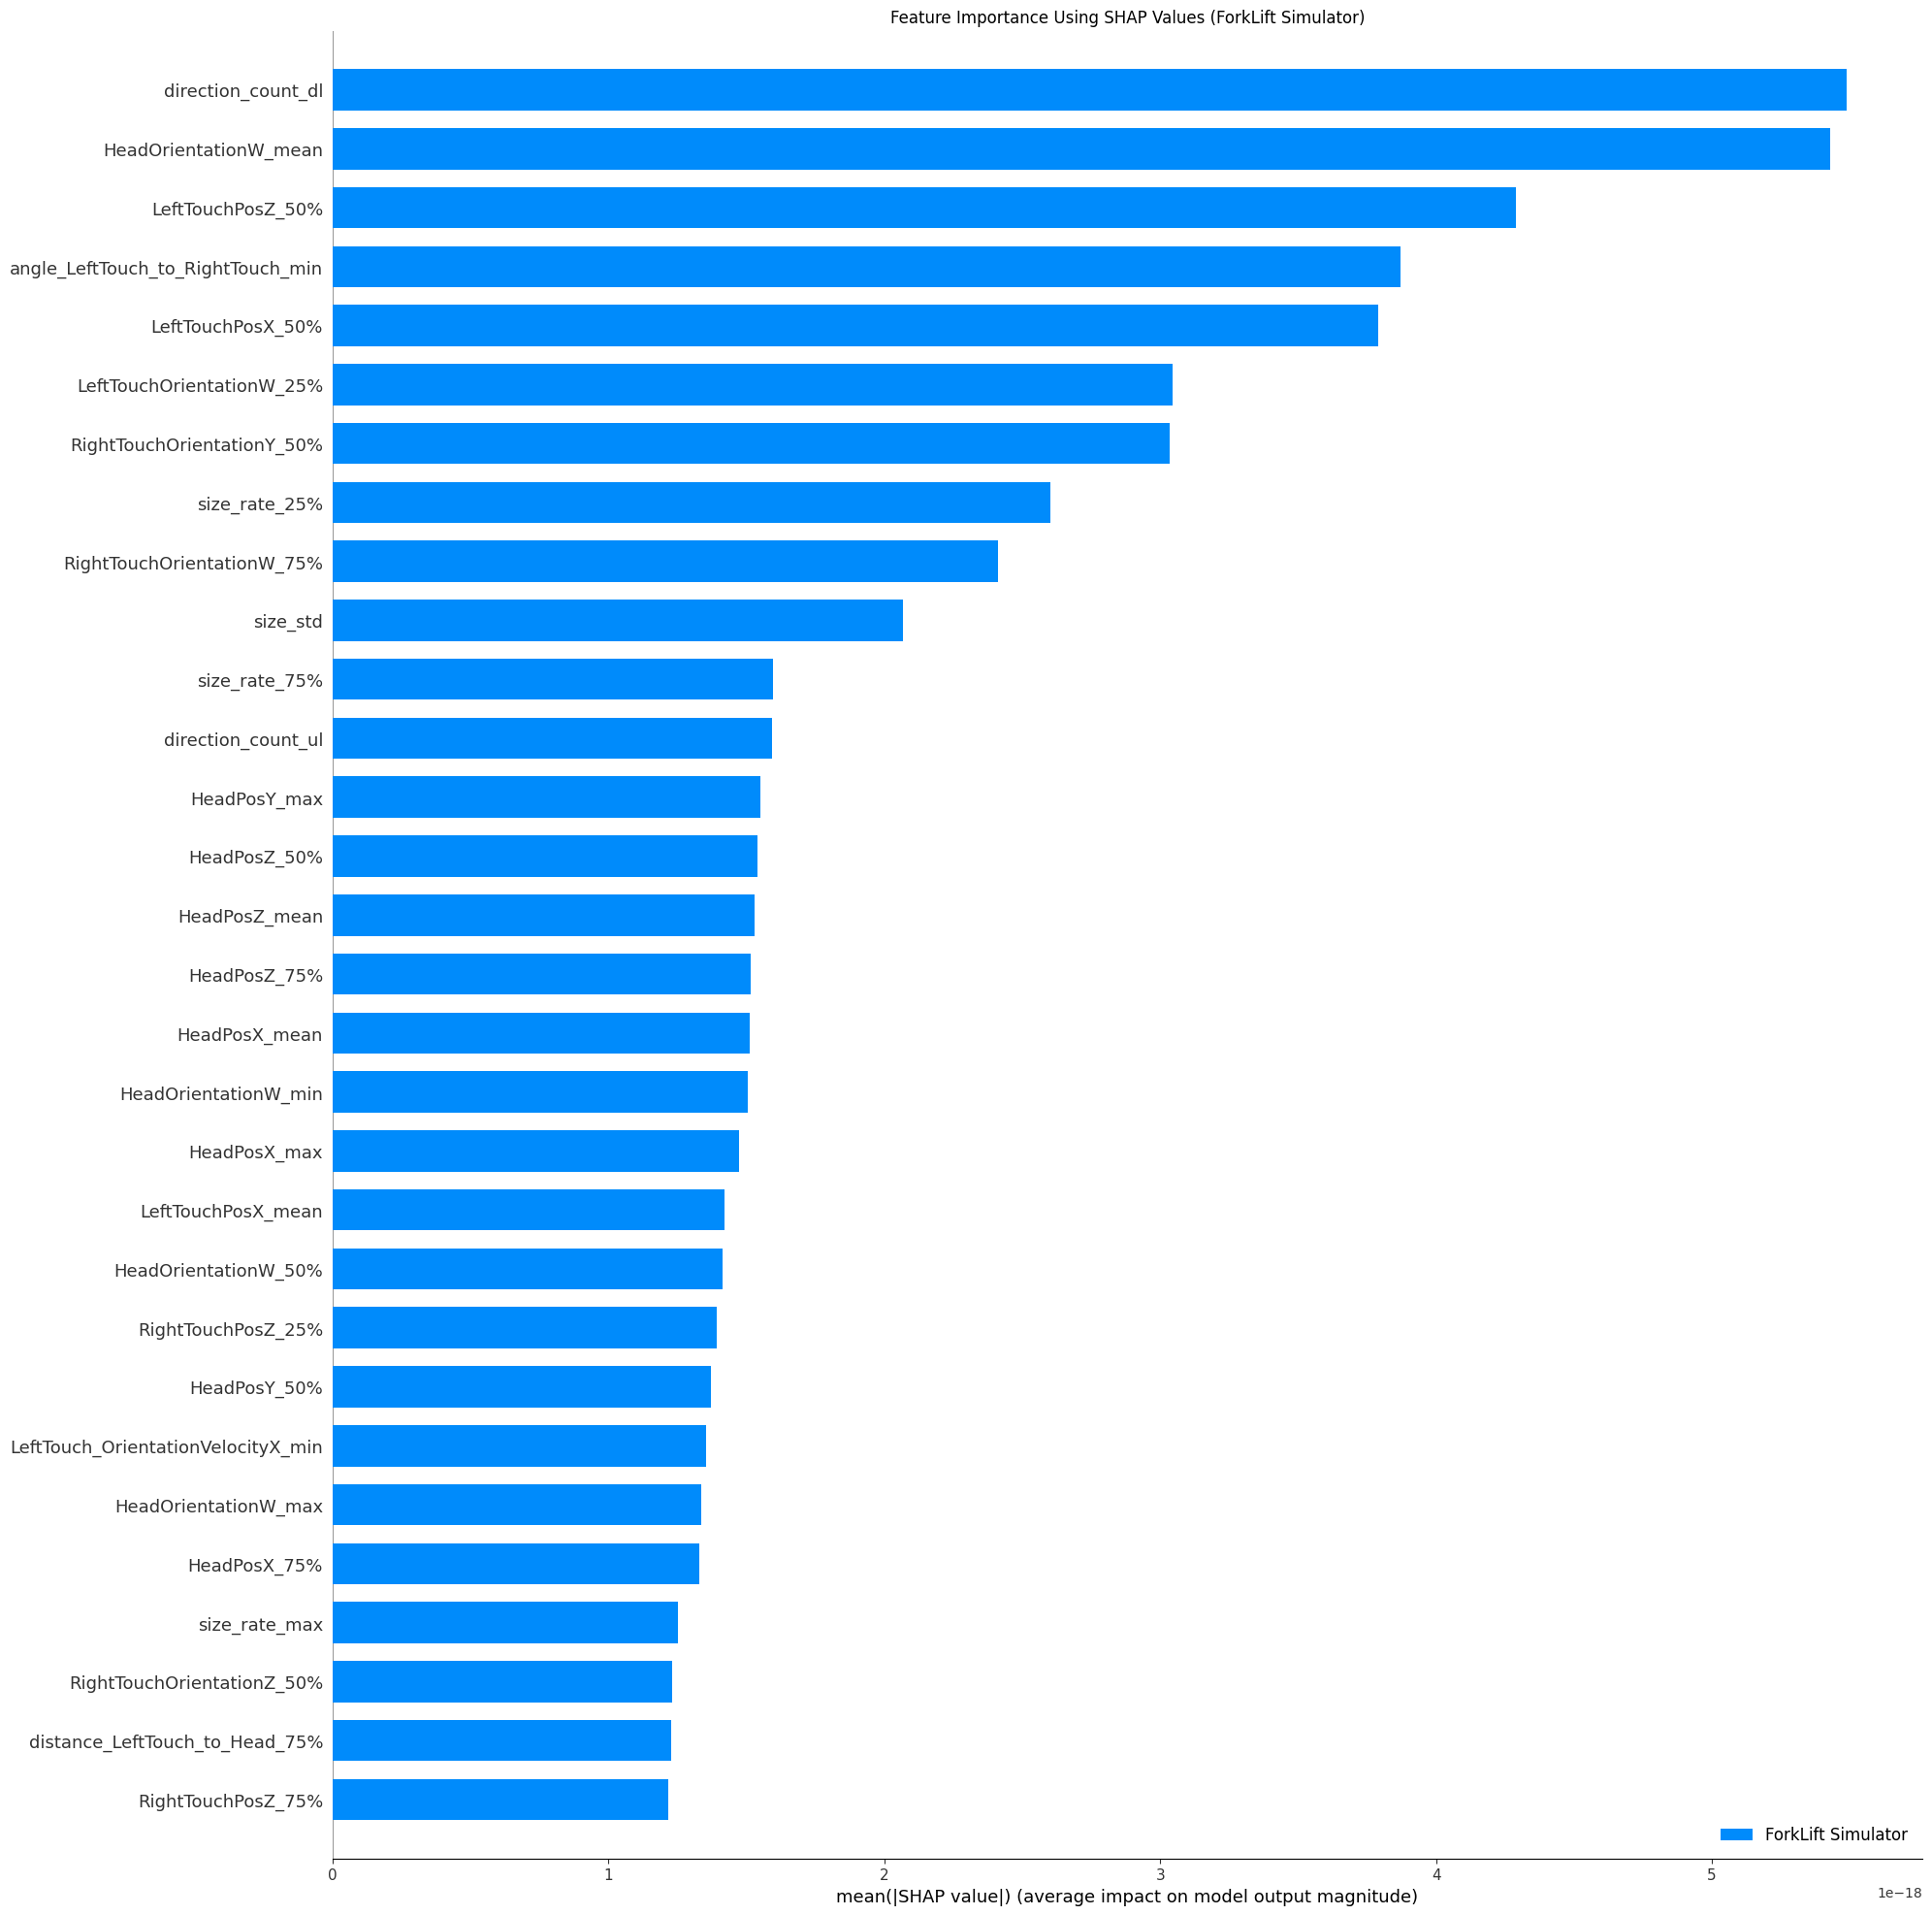

In [23]:
VisualizationUtils.shap_plotter([np.mean(shap_values_slow, axis=2)], 
                          X_test, title="Feature Importance Using SHAP Values (ForkLift Simulator)",
                          class_names=['ForkLift Simulator'])

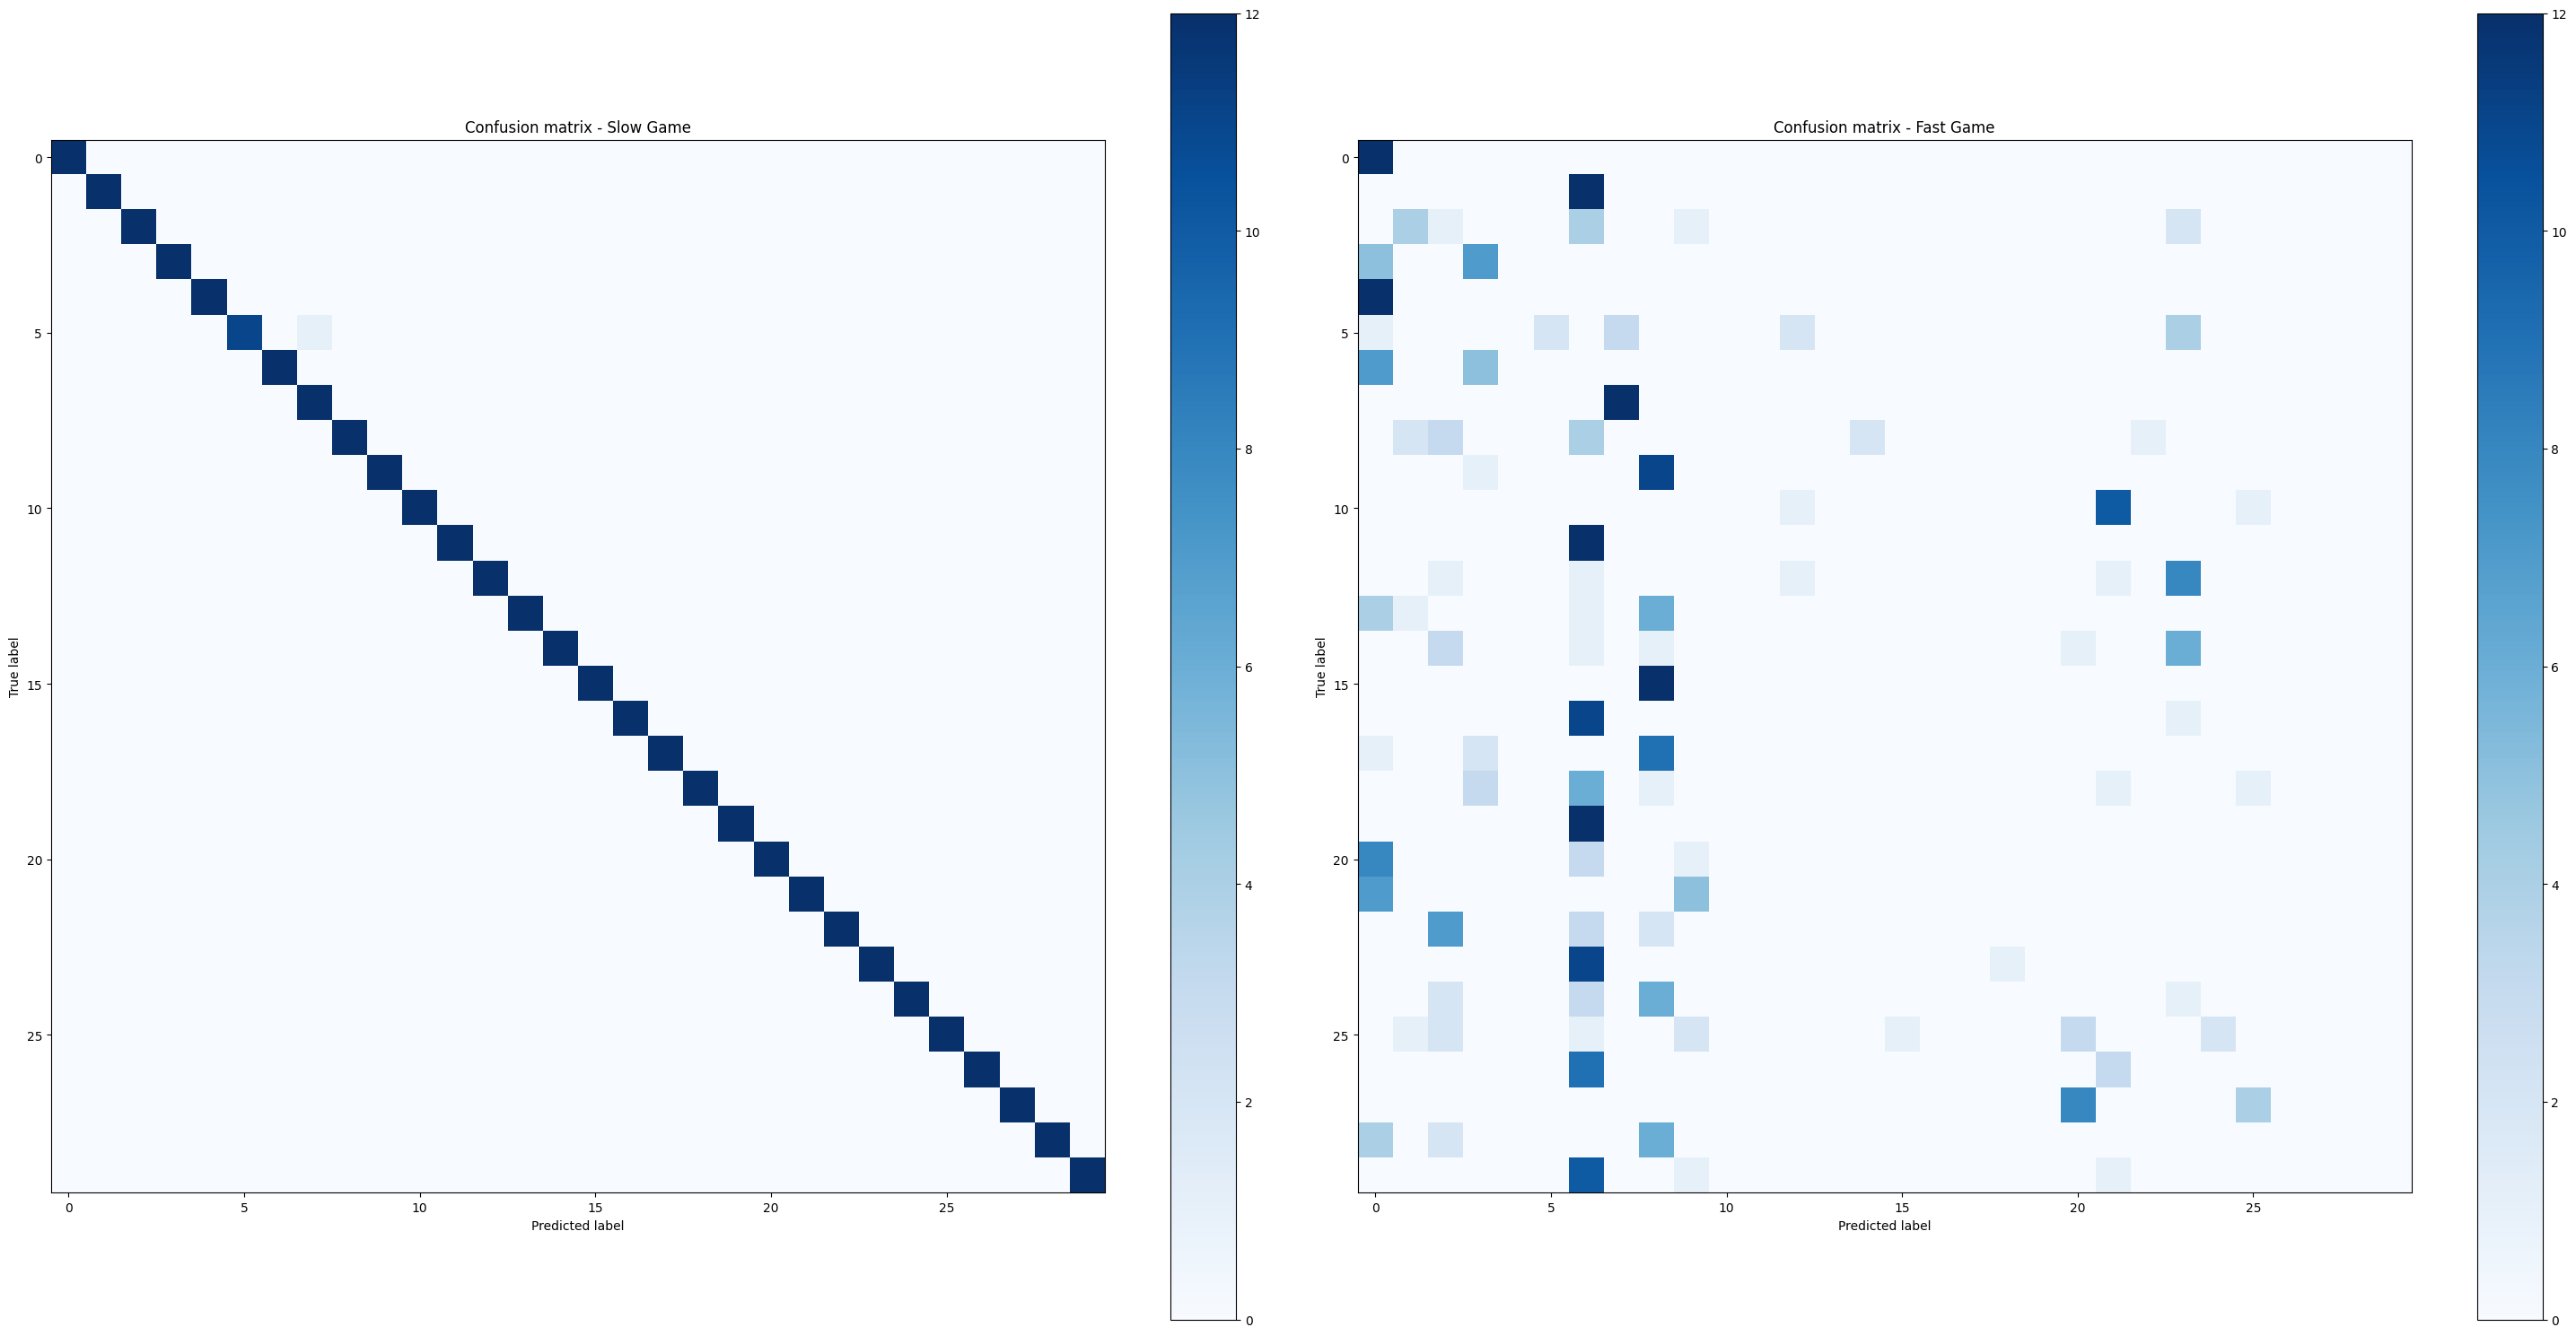

In [24]:
VisualizationUtils.confusion_matrices(cm_slow, cm_fast)

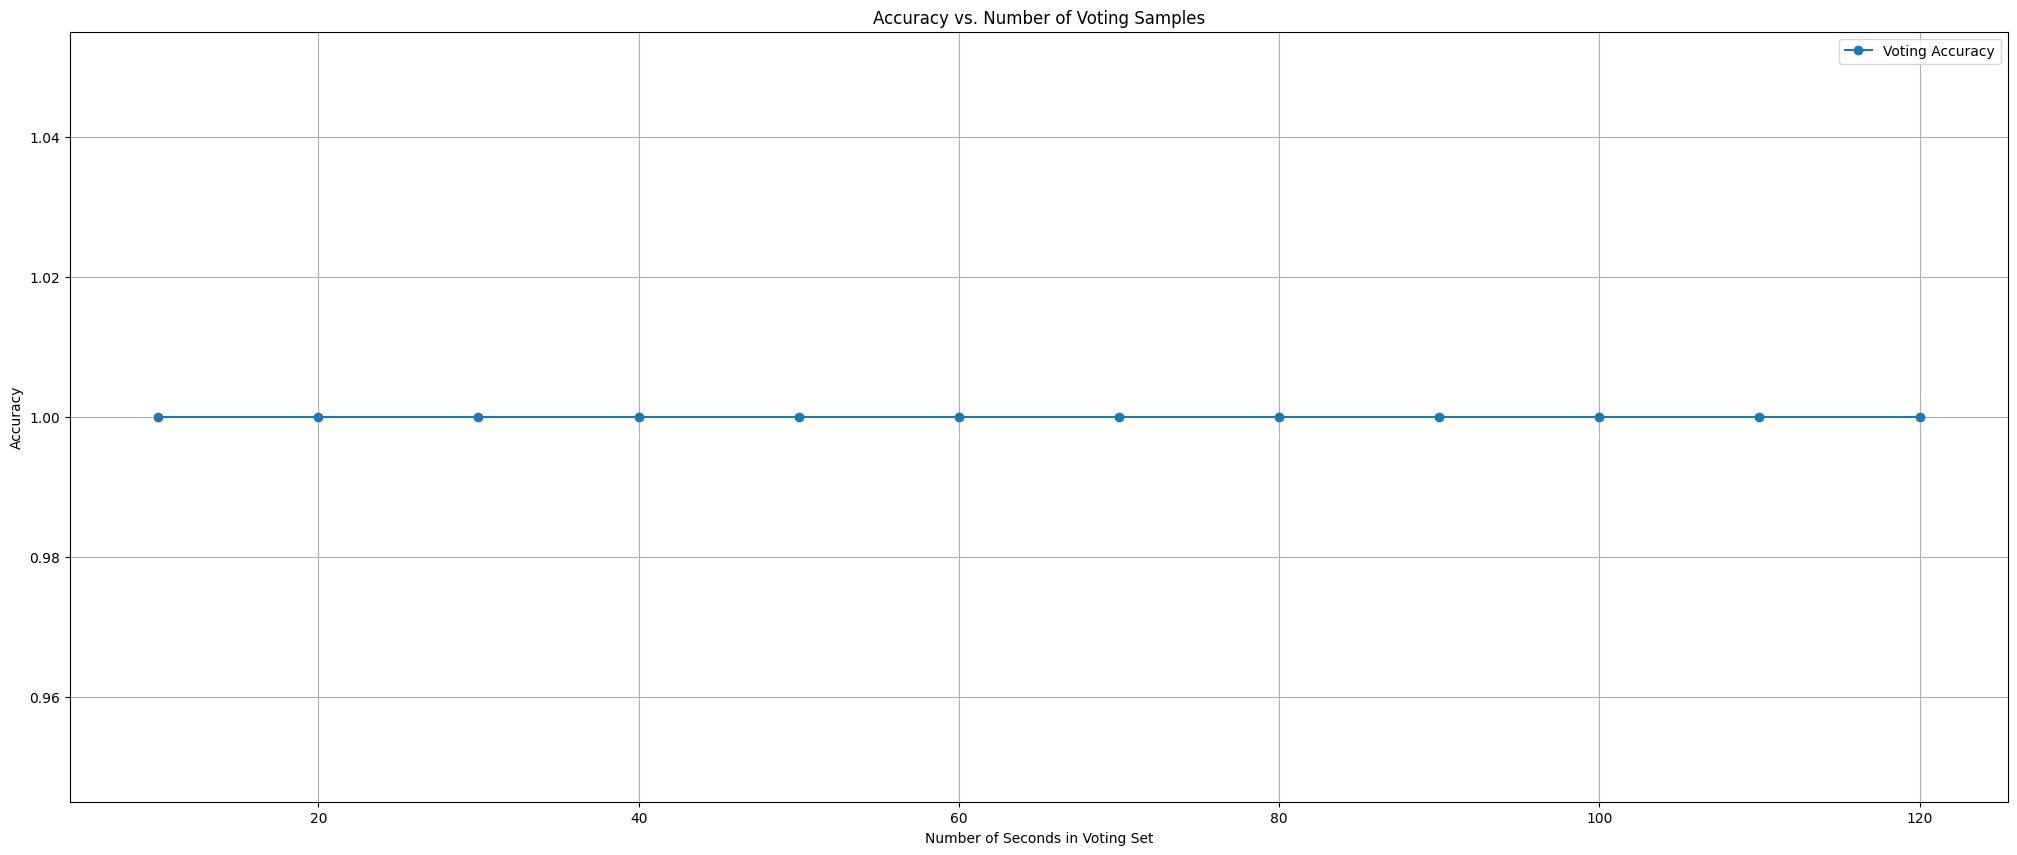


Vote Over Time Data Table:


,Seconds in Voting Set,Voting Accuracy
0,10,1.0
1,20,1.0
2,30,1.0
3,40,1.0
4,50,1.0
5,60,1.0
6,70,1.0
7,80,1.0
8,90,1.0
9,100,1.0


In [25]:
evaluator.plot_accuracy_by_vote(best_model_slow, X_test, y_test, increment=1)

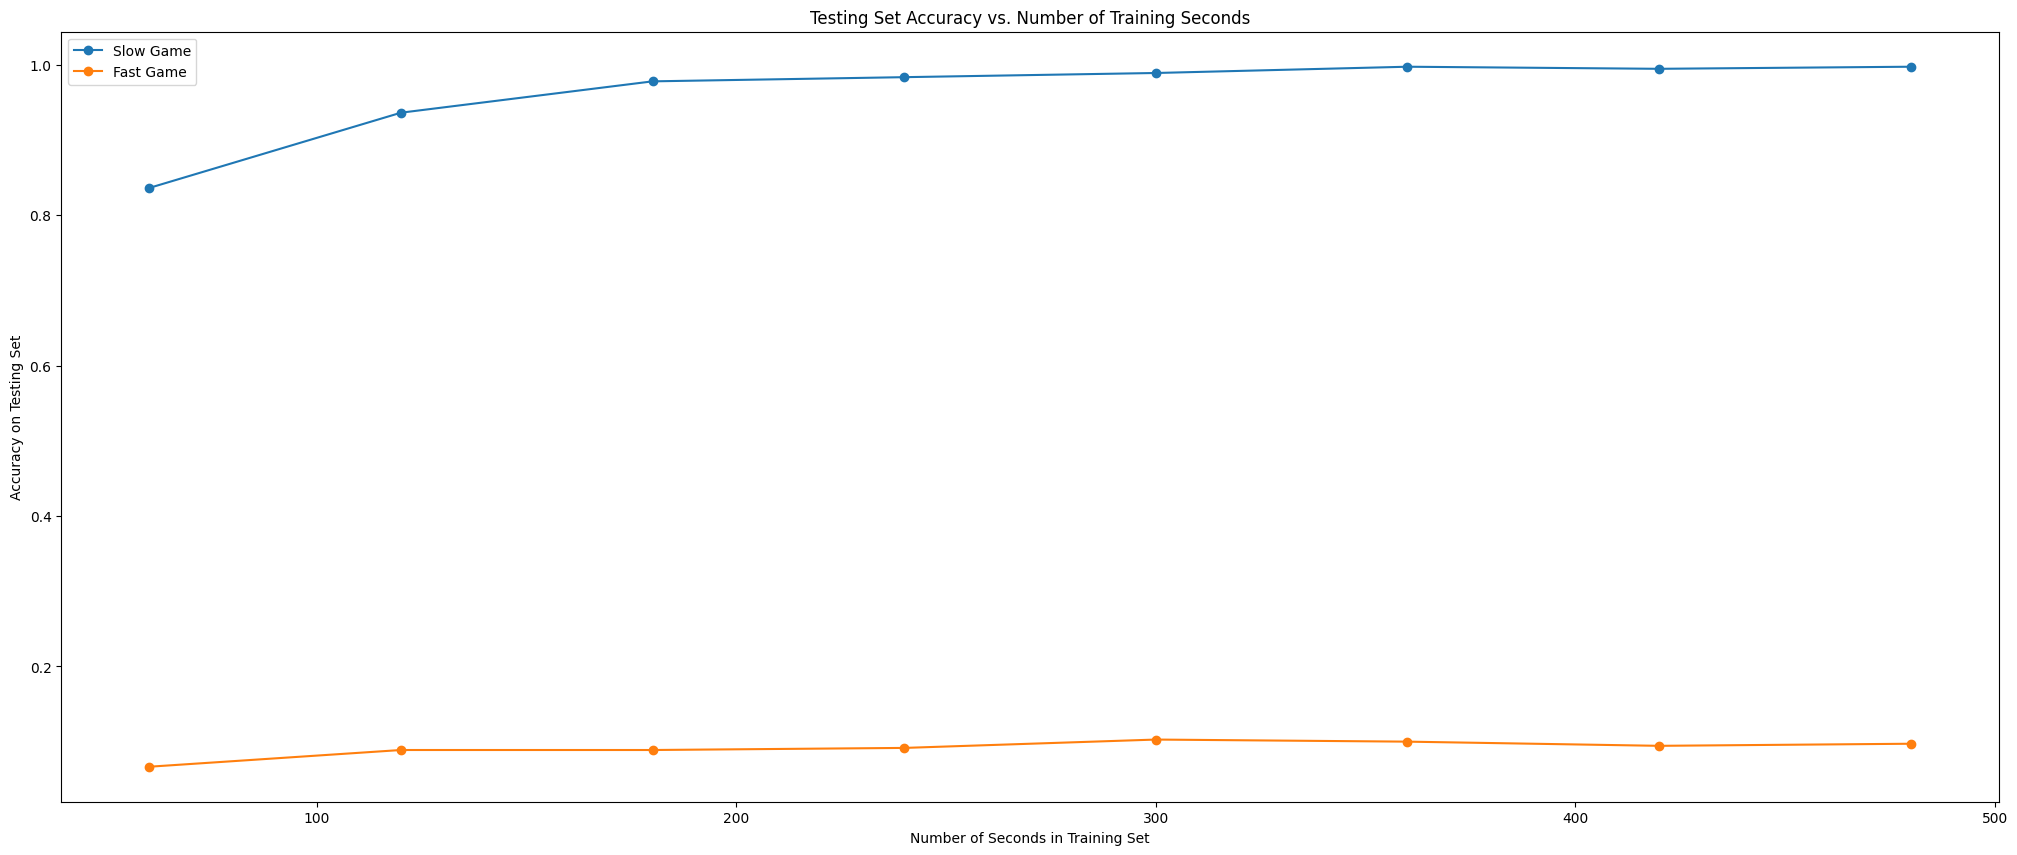


Accuracy Over Time Data Table:


,Seconds in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,60,0.836111,0.066667
1,120,0.936111,0.088889
2,180,0.977778,0.088889
3,240,0.983333,0.091667
4,300,0.988889,0.102778
5,360,0.997222,0.100000
6,420,0.994444,0.094444
7,480,0.997222,0.097222


In [26]:
evaluator.accuracy_over_time(X, y,best_model_slow_name, range(1,9), X_test, y_test, fX_test, fy_test)

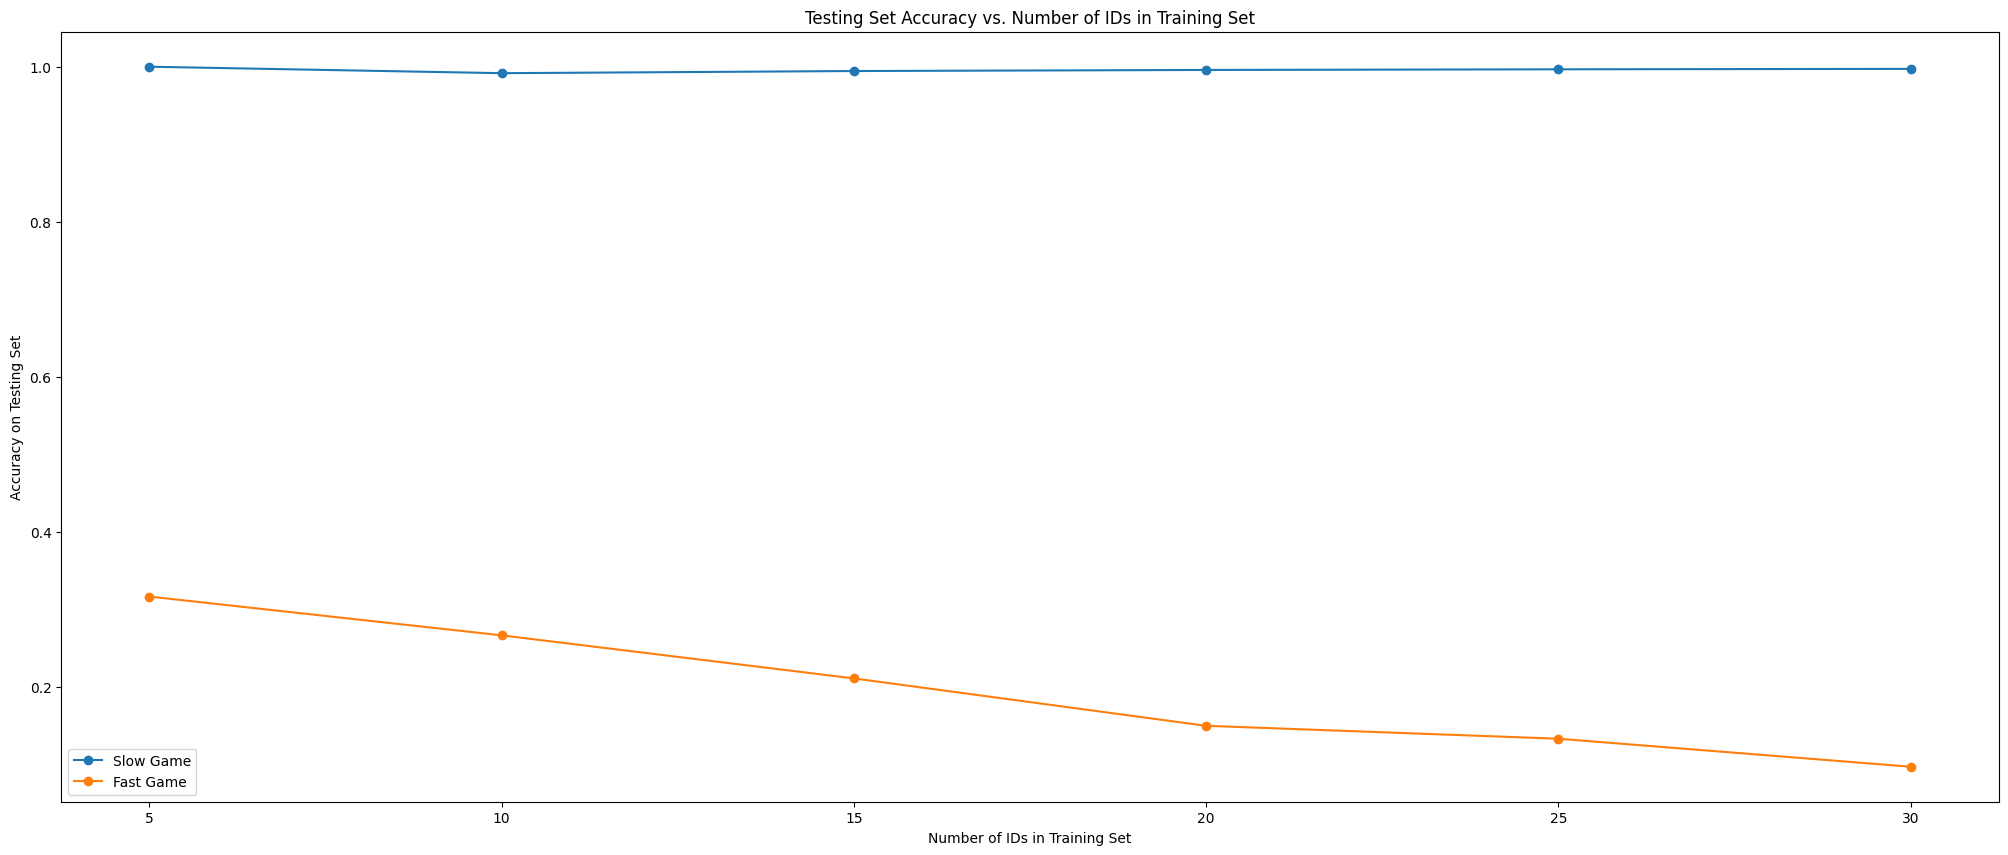


ID Over Time Data Table:


,Number of IDs in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,5,1.000000,0.316667
1,10,0.991667,0.266667
2,15,0.994444,0.211111
3,20,0.995833,0.150000
4,25,0.996667,0.133333
5,30,0.997222,0.097222


In [27]:
evaluator.accuracy_over_ids(X_train, y_train,best_model_slow_name, X_test, y_test,fX_test, fy_test)

### 3.1.4. Training On Medal of Honor

In [28]:
Accuracy_set, models, best_model_slow, best_model_fast, cm_slow, cm_fast, best_model_slow_name, best_model_fast_name = evaluator.evaluate_classifiers(fX_train,fy_train,X_test,y_test,fX_test,fy_test)
Accuracy_set.sort_values(by='Accuracy(Fast)').style.background_gradient(cmap= plt.cm.Blues)

100%|██████████| 15/15 [05:54<00:00, 23.66s/it]


,Model,Accuracy(Train),Accuracy(Slow),Accuracy(Fast),F1(Train),F1(Slow),F1(Fast),Precision(Train),Precision(Slow),Precision(Fast),Recall(Train),Recall(Slow),Recall(Fast),Log_loss(Train),Log_loss(Slow),Log_loss(Fast)
9,QuadraticDiscriminantAnalysis,1.000000,0.055556,0.044444,1.000000,0.050410,0.049536,1.000000,0.073079,0.064983,1.000000,0.055556,0.044444,0.000000,34.041228,34.441713
11,BernoulliNB,0.116667,0.027778,0.044444,0.117698,0.001927,0.019006,0.620510,0.000998,0.034545,0.116667,0.027778,0.044444,3.303513,4.135566,4.088124
7,AdaBoostClassifier,0.100000,0.066667,0.097222,0.057595,0.024521,0.056480,0.050555,0.017857,0.051231,0.100000,0.066667,0.097222,3.055726,4.156951,3.148366
0,SVC,0.668056,0.150000,0.427778,0.658462,0.082129,0.401366,0.721178,0.074696,0.449884,0.668056,0.150000,0.427778,3.417046,3.404390,3.413378
4,KNeighborsClassifier,0.852083,0.116667,0.519444,0.851074,0.050383,0.514423,0.862266,0.034010,0.544246,0.852083,0.116667,0.519444,0.437432,29.990377,9.047186
8,GaussianNB,0.822917,0.072222,0.586111,0.809876,0.026821,0.545373,0.851598,0.019167,0.666383,0.822917,0.072222,0.586111,5.336056,33.369149,13.994023
3,DecisionTreeClassifier,1.000000,0.161111,0.636111,1.000000,0.110863,0.607604,1.000000,0.092125,0.600246,1.000000,0.161111,0.636111,0.000000,30.236620,13.115885
12,BaggingClassifier,0.997917,0.216667,0.713889,0.997917,0.123995,0.692081,0.997945,0.092598,0.702958,0.997917,0.216667,0.713889,0.105944,22.312427,3.008020
10,LogisticRegression,0.984028,0.172222,0.738889,0.983956,0.109203,0.727130,0.984182,0.141159,0.752954,0.984028,0.172222,0.738889,0.270334,4.195289,0.980265
6,MLPClassifier,0.995833,0.172222,0.747222,0.995833,0.105825,0.737088,0.995876,0.117215,0.765418,0.995833,0.172222,0.747222,0.093141,6.673157,1.036459


In [29]:
explainer = shap.TreeExplainer(best_model_fast)
shap_values_fast = explainer.shap_values(fX_test)

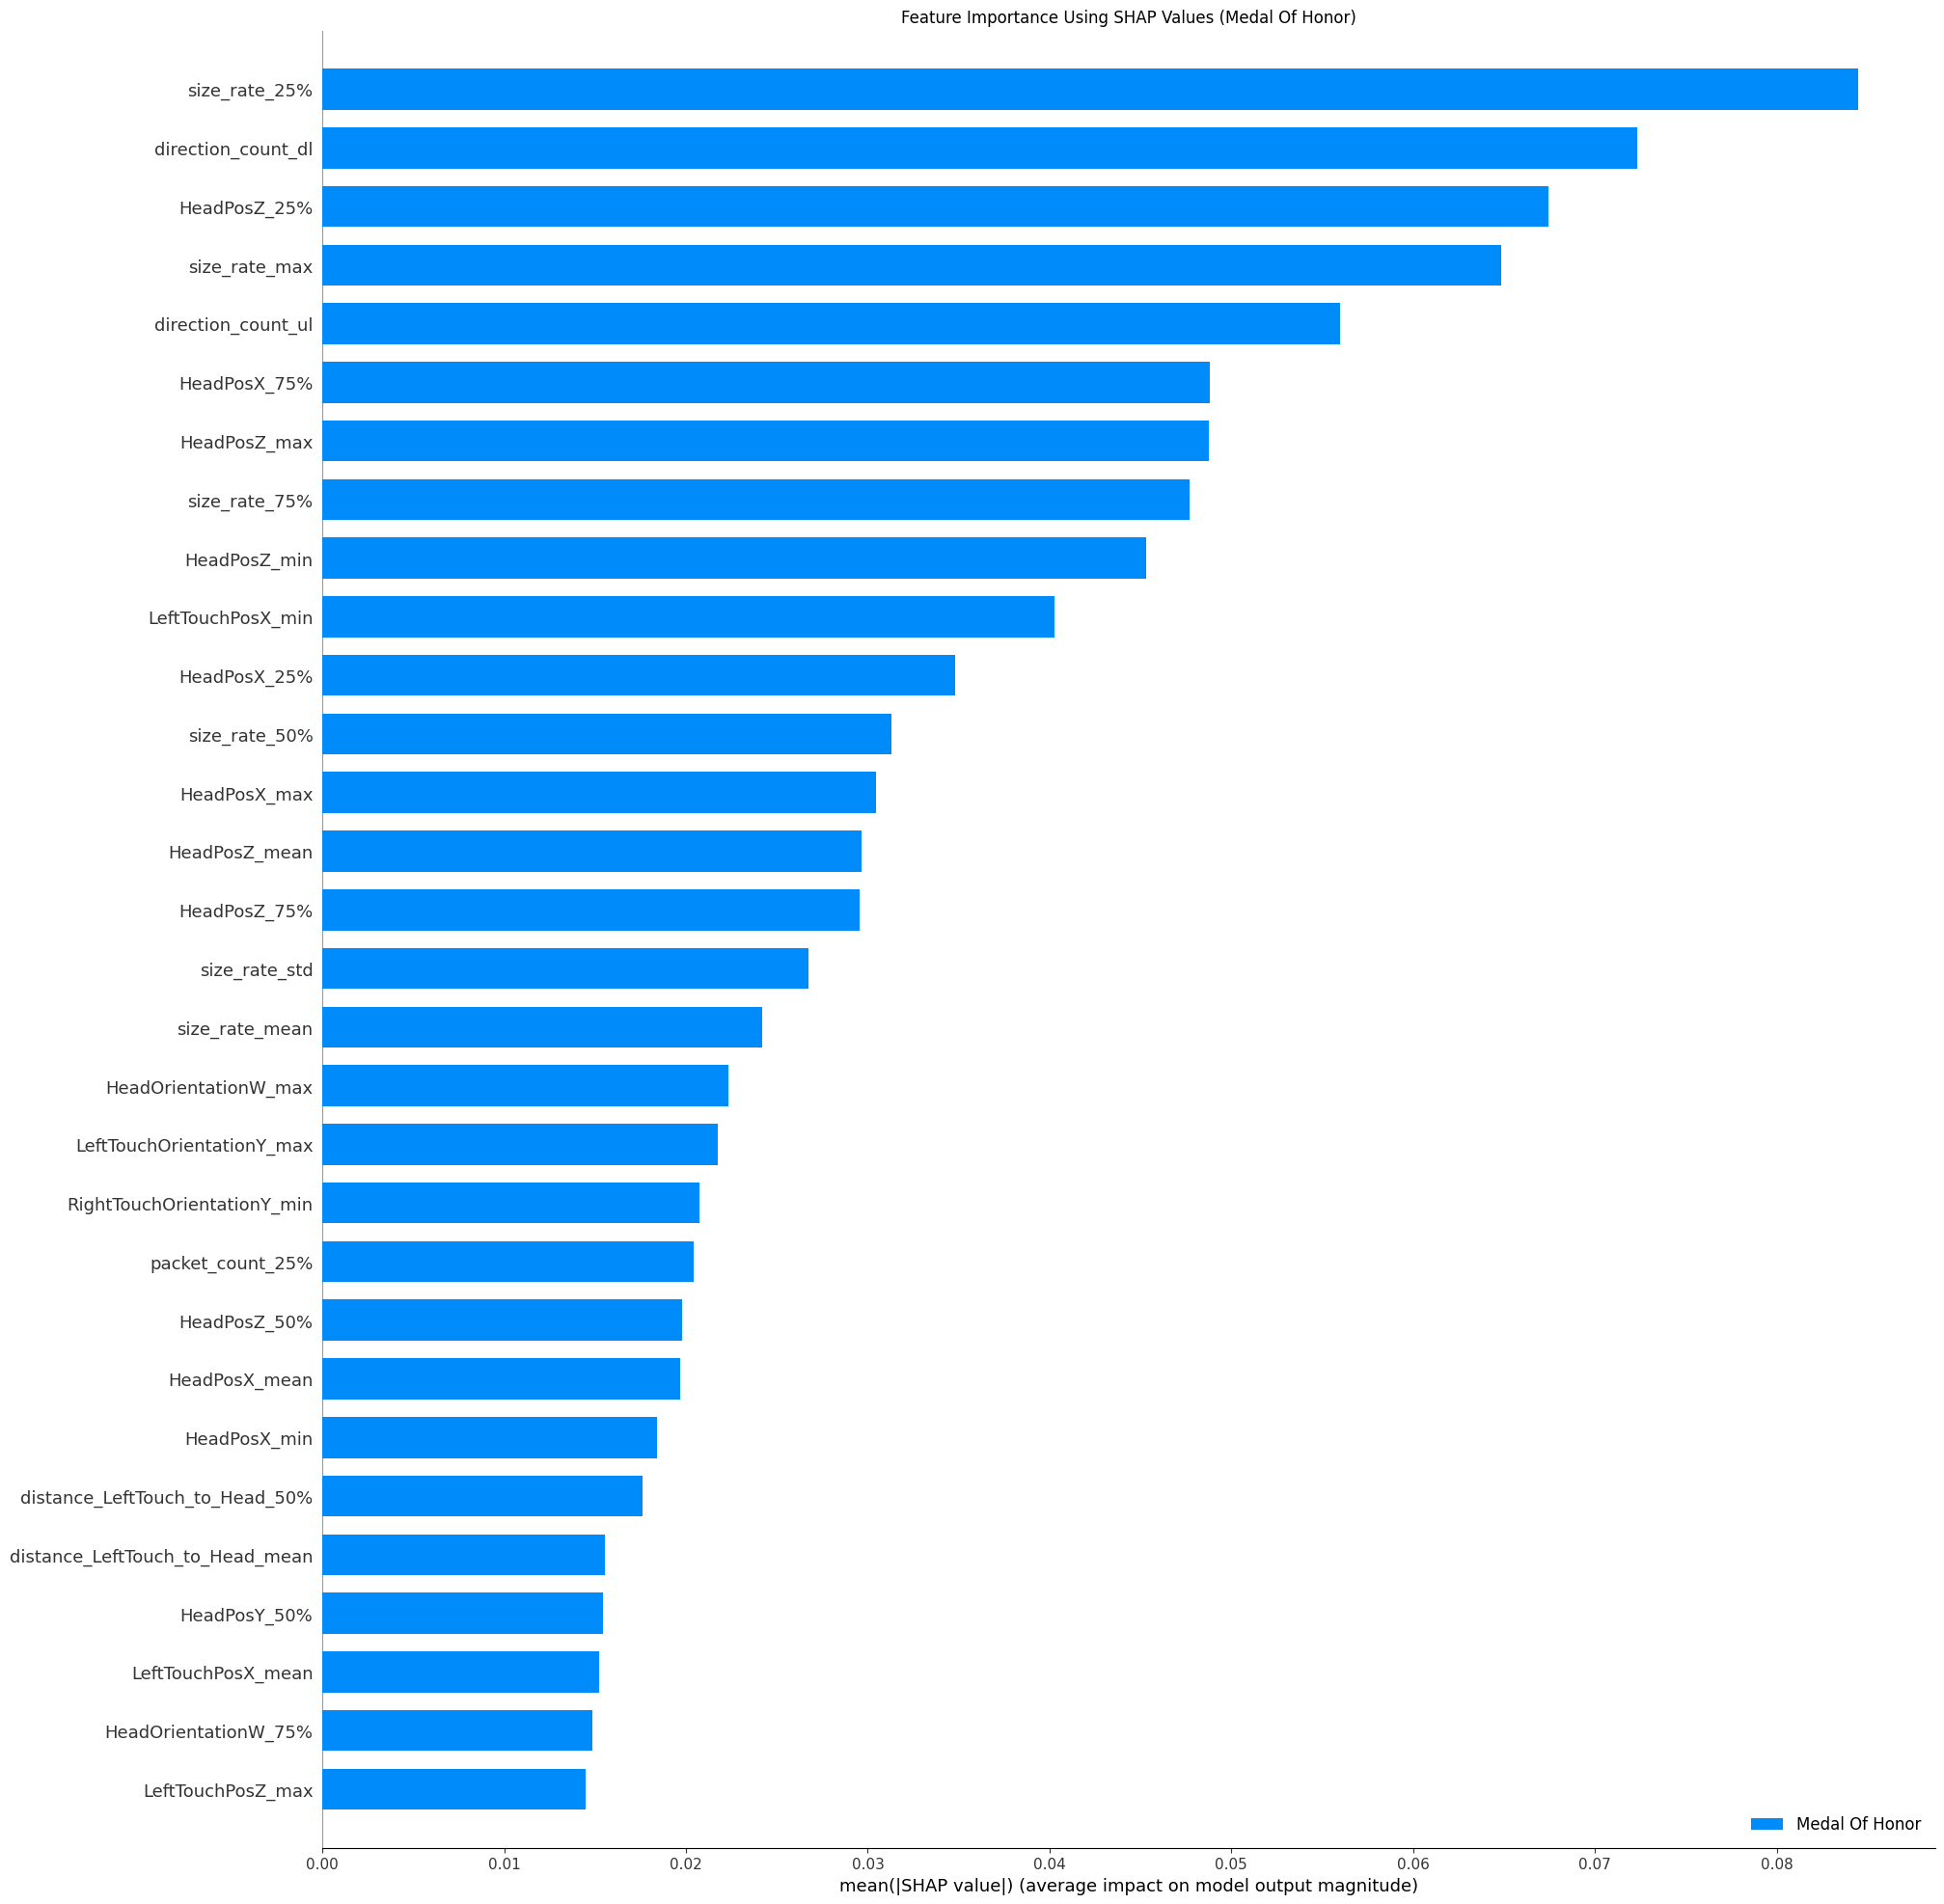

In [30]:
VisualizationUtils.shap_plotter([np.mean(shap_values_fast, axis=2)], 
                          fX_test, title="Feature Importance Using SHAP Values (Medal Of Honor)",
                          class_names=['Medal Of Honor'])

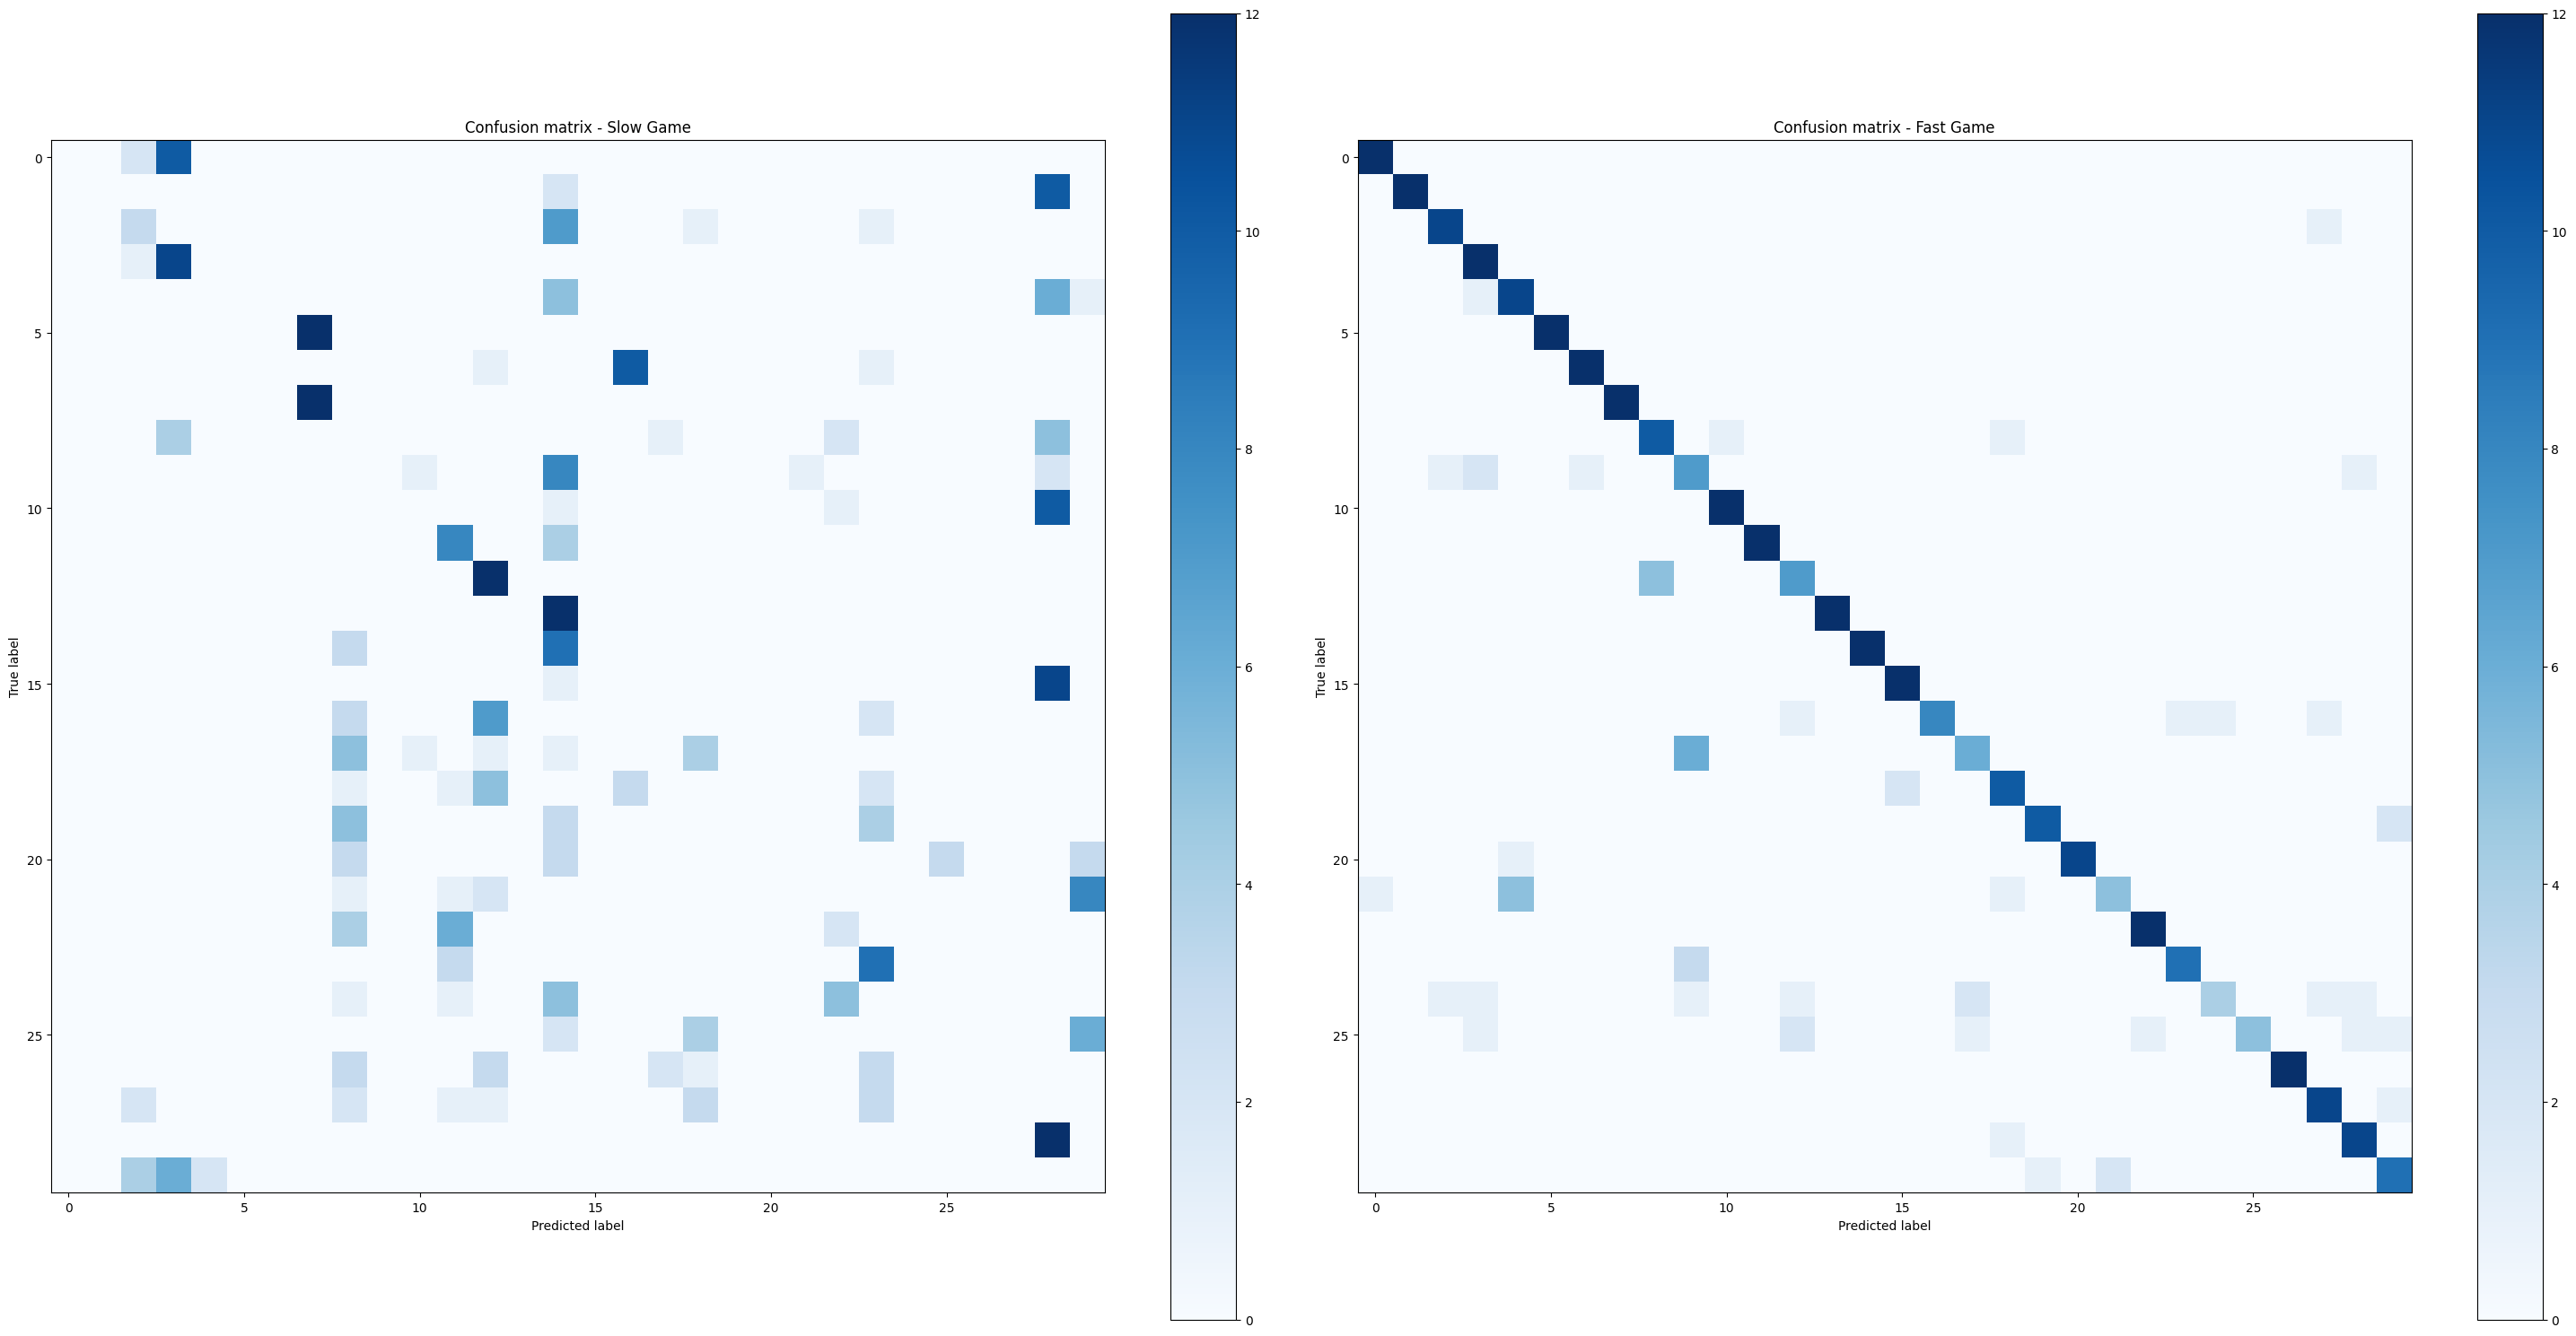

In [31]:
VisualizationUtils.confusion_matrices(cm_slow, cm_fast)

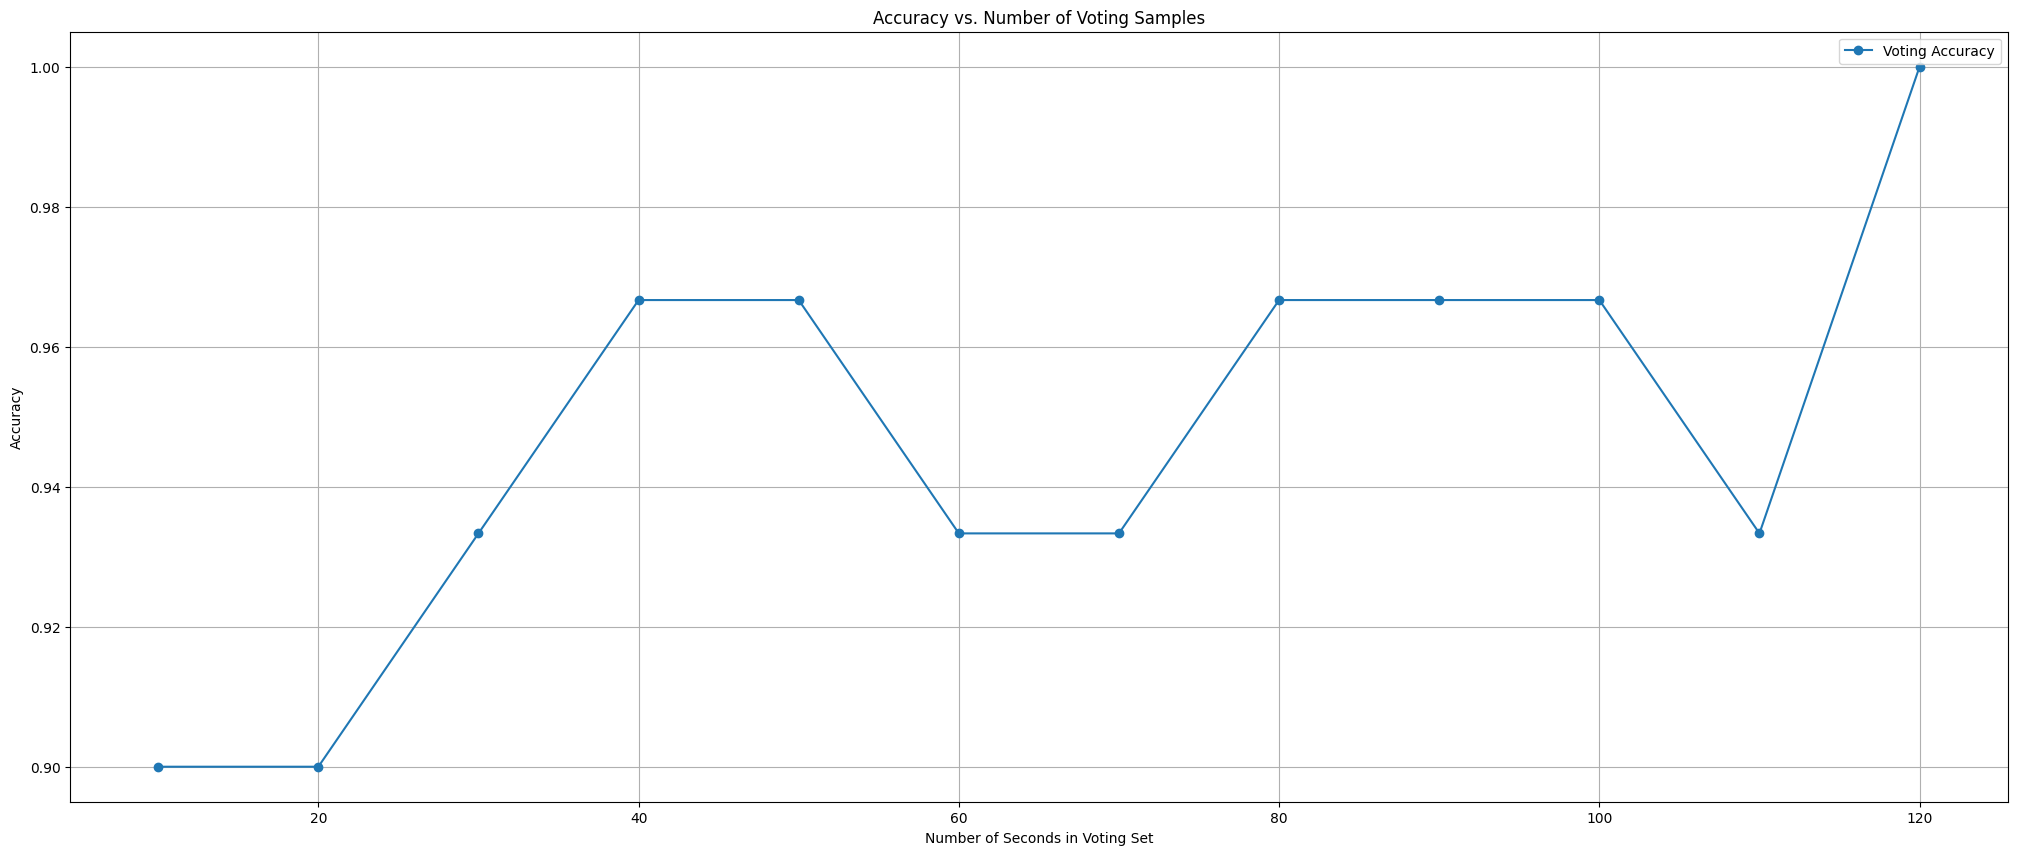


Vote Over Time Data Table:


,Seconds in Voting Set,Voting Accuracy
0,10,0.900000
1,20,0.900000
2,30,0.933333
3,40,0.966667
4,50,0.966667
5,60,0.933333
6,70,0.933333
7,80,0.966667
8,90,0.966667
9,100,0.966667


In [32]:
evaluator.plot_accuracy_by_vote(best_model_fast, fX_test, fy_test, increment=1)

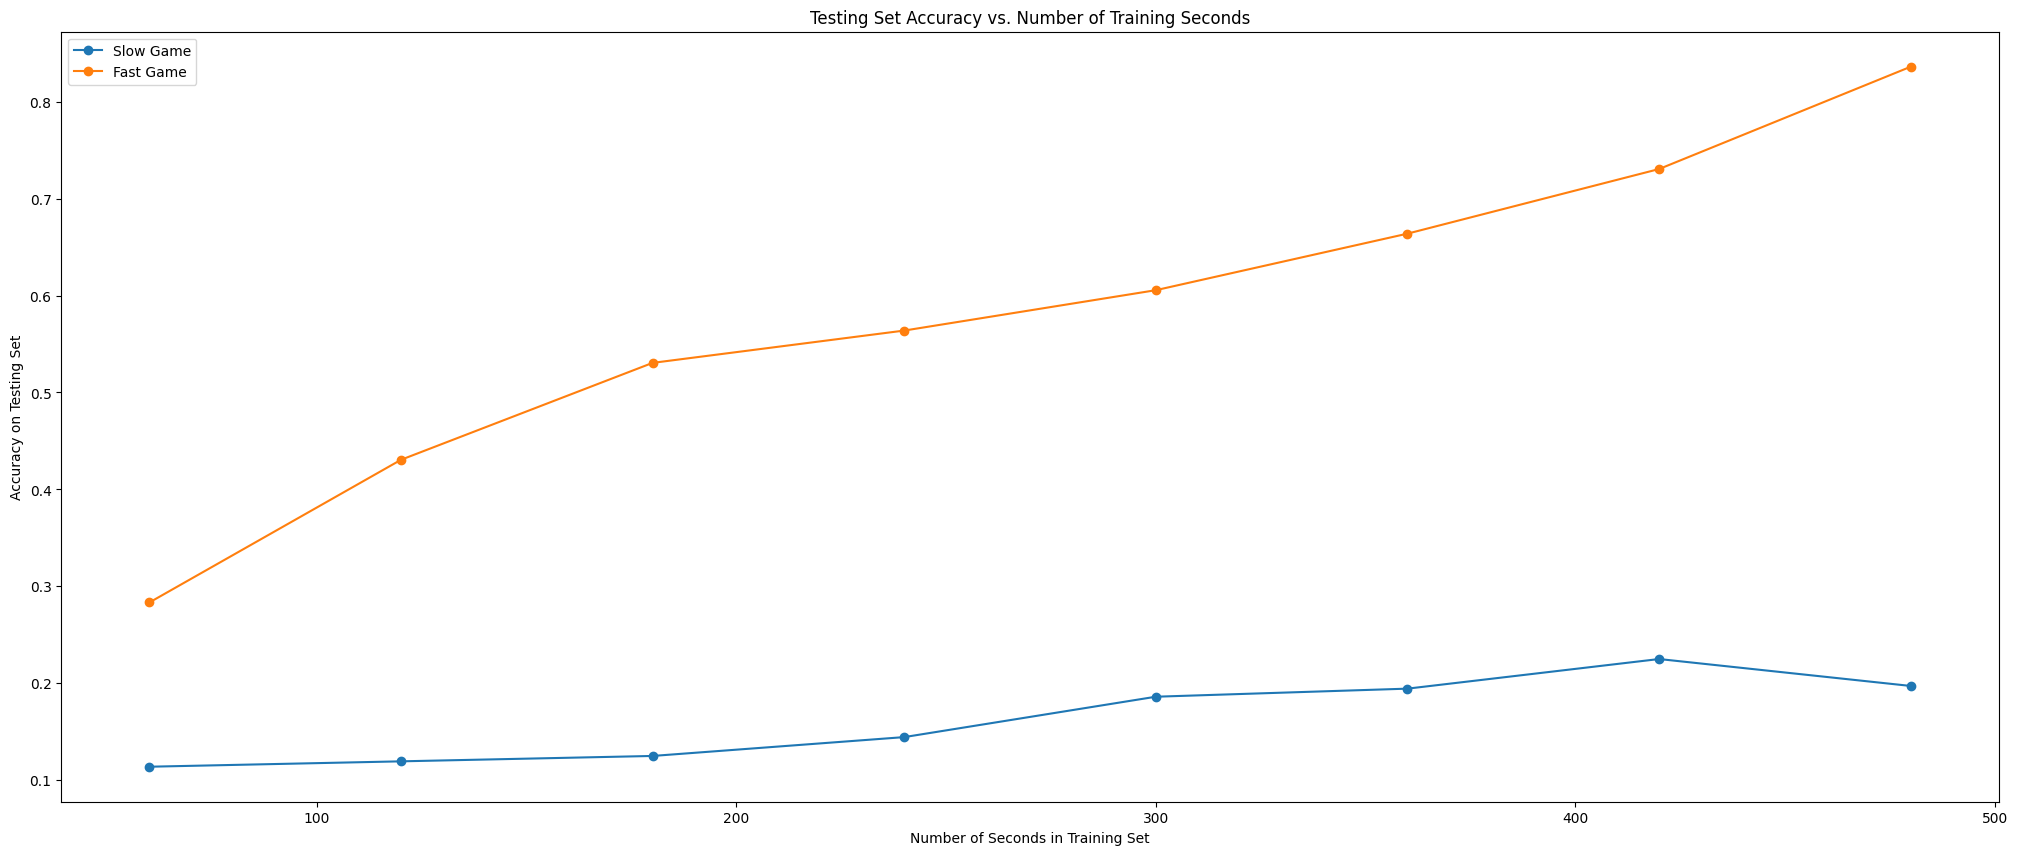


Accuracy Over Time Data Table:


,Seconds in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,60,0.113889,0.283333
1,120,0.119444,0.430556
2,180,0.125000,0.530556
3,240,0.144444,0.563889
4,300,0.186111,0.605556
5,360,0.194444,0.663889
6,420,0.225000,0.730556
7,480,0.197222,0.836111


In [33]:
evaluator.accuracy_over_time(fX, fy,best_model_fast_name, range(1,9), X_test, y_test, fX_test, fy_test)

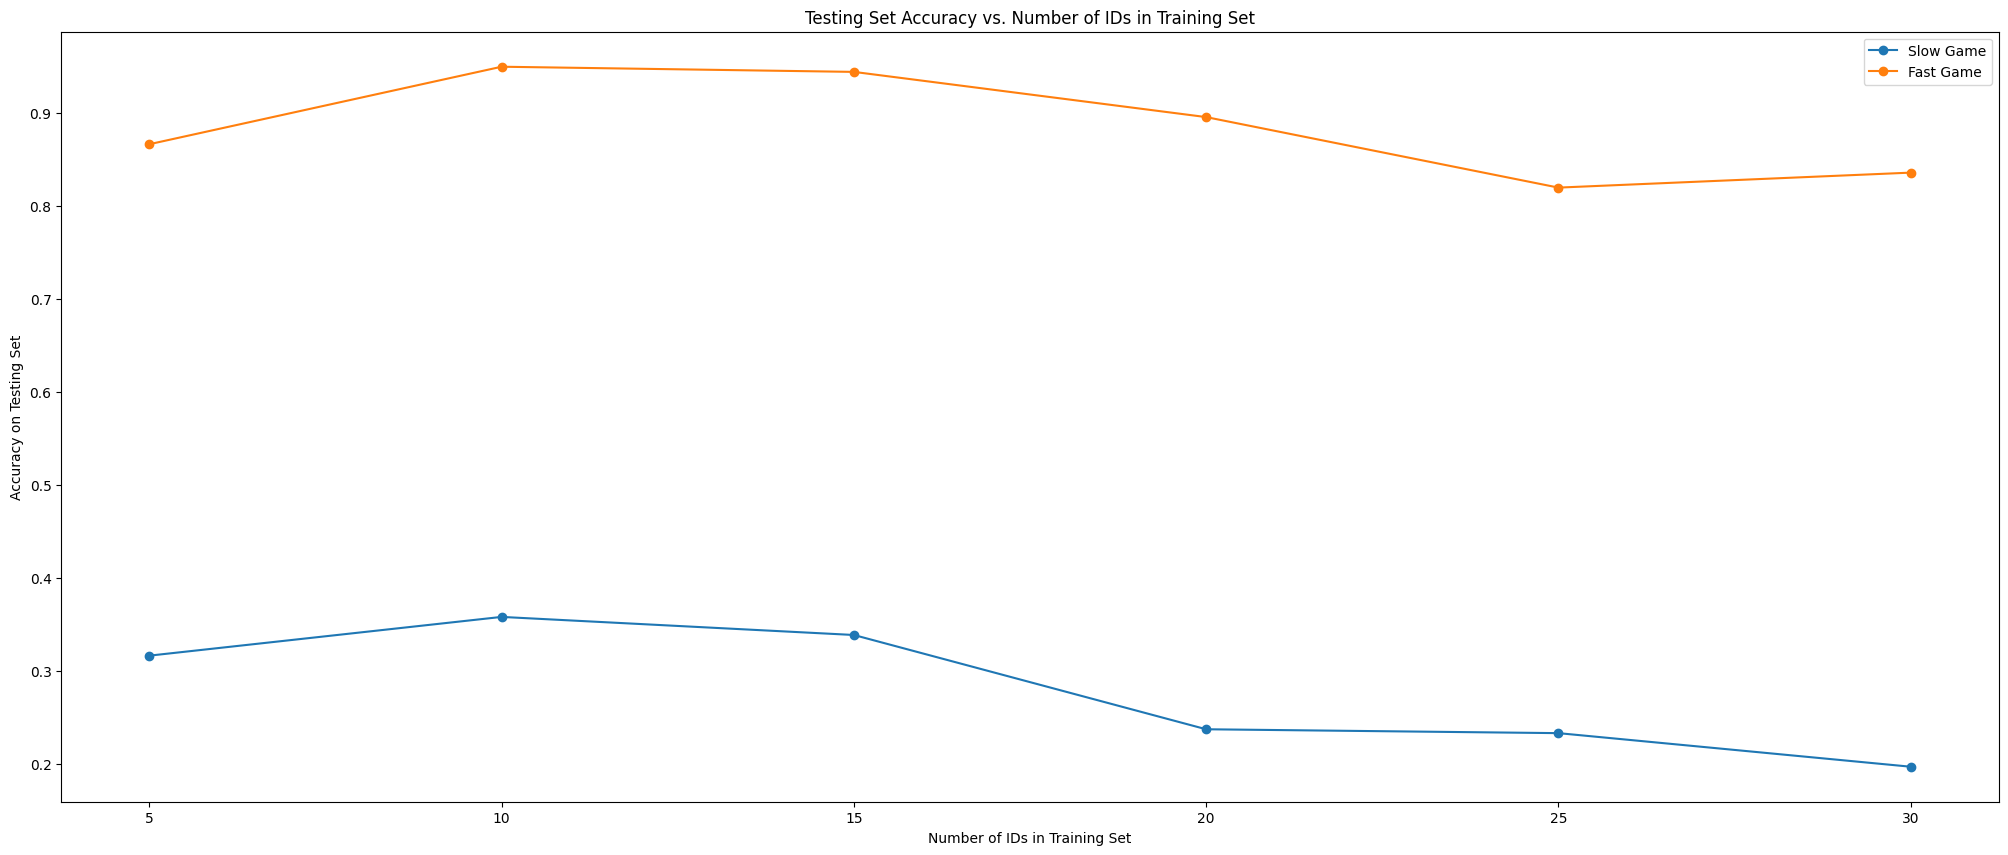


ID Over Time Data Table:


,Number of IDs in Training Set,Slow Game Accuracy,Fast Game Accuracy
0,5,0.316667,0.866667
1,10,0.358333,0.950000
2,15,0.338889,0.944444
3,20,0.237500,0.895833
4,25,0.233333,0.820000
5,30,0.197222,0.836111


In [34]:
evaluator.accuracy_over_ids(fX_train, fy_train,best_model_fast_name, X_test, y_test,fX_test, fy_test)